# Credit EDA Case Study


### Business Objective:

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.


In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

## 1. Importing all necessary libraries

In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 300) # to display all the columns
pd.set_option('display.max_rows', 300) # to display all the rows
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format
import itertools

## 2. New Application data check

### 2.1 Reading the files

In [3]:
application_data= pd.read_csv("application_data.csv")


### 2.2 Examining the application data

In [4]:
application_data.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0      100002       1         Cash loans           M            N               Y             0         202500.00   406597.50     24700.50        351000.00   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                        0.02       -9461           -637           -3648.00            -2120          nan           1               1                0                 1           1           0        Laborers             1.00                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3          0.08          0.26          0.14            0.02              0.04                         0.97             0.62            0.01           0.00           0.07           0.08           0.12          0.04   
1      100003       0         Cash loans           F            N               N             0         270000.00  1293502.50     35698.50       1129500.00          Family    State servant               Higher education               Married  House / apartment                        0.00      -16765          -1188           -1186.00             -291          nan           1               1                0                 1           1           0      Core staff             2.00                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School          0.31          0.62           nan            0.10              0.05                         0.99             0.80            0.06           0.08           0.03           0.29           0.33          0.01   
2      100004       0    Revolving loans           M            Y               Y             0          67500.00   135000.00      6750.00        135000.00   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                        0.01      -19046           -225           -4260.00            -2531        26.00           1               1                1                 1           1           0        Laborers             1.00                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government           nan          0.56          0.73             nan               nan                          nan              nan             nan            nan            nan            nan            nan           nan   
3      100006       0         Cash loans           F           

In [5]:
 #checking the shape of  the dataframe
application_data.shape

(307511, 122)

In [6]:
# checking the column and datatypes
application_data.info(verbose= True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

### 3. Data Quality Check and  Missing Values

### 3.1 Checking missing values in Application data


In [7]:
# Checking the null values% in application data
null_valuesapp=((application_data.isnull().sum()/application_data.index.size)*100).sort_values(ascending=False)
null_valuesapp

COMMONAREA_MEDI                69.87
COMMONAREA_AVG                 69.87
COMMONAREA_MODE                69.87
NONLIVINGAPARTMENTS_MODE       69.43
NONLIVINGAPARTMENTS_MEDI       69.43
NONLIVINGAPARTMENTS_AVG        69.43
FONDKAPREMONT_MODE             68.39
LIVINGAPARTMENTS_MEDI          68.35
LIVINGAPARTMENTS_MODE          68.35
LIVINGAPARTMENTS_AVG           68.35
FLOORSMIN_MEDI                 67.85
FLOORSMIN_MODE                 67.85
FLOORSMIN_AVG                  67.85
YEARS_BUILD_MEDI               66.50
YEARS_BUILD_AVG                66.50
YEARS_BUILD_MODE               66.50
OWN_CAR_AGE                    65.99
LANDAREA_MODE                  59.38
LANDAREA_AVG                   59.38
LANDAREA_MEDI                  59.38
BASEMENTAREA_MEDI              58.52
BASEMENTAREA_AVG               58.52
BASEMENTAREA_MODE              58.52
EXT_SOURCE_1                   56.38
NONLIVINGAREA_MEDI             55.18
NONLIVINGAREA_AVG              55.18
NONLIVINGAREA_MODE             55.18
E

### 3.2 Removing columns with high null values

In [8]:
#accessing columns where there are more than 40% of null values
dropCols = []
dropCols = list(application_data.columns[((application_data.isnull().sum()/application_data.index.size)*100)>=40])
len(dropCols)

49

In [9]:
#dropping the columns
application_data.drop(labels=dropCols,axis=1,inplace=True)


In [10]:
#checking if the columsn are dropped or not
application_data.shape

(307511, 73)

In [11]:
# Delete some more columns whcih we felt is not required for the analysis
unwanted =['EXT_SOURCE_3','REGION_POPULATION_RELATIVE',
 'FLAG_PHONE','FLAG_MOBIL','FLAG_CONT_MOBILE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','EXT_SOURCE_2','FLAG_WORK_PHONE','FLAG_EMAIL','FLAG_EMP_PHONE']
application_data.drop(columns=unwanted, axis=1, inplace = True)

In [12]:
application_data.shape

(307511, 31)

Deleted 90 columns from application data which we feel are not required for analysis

In [13]:
#Checking the data for nullvalue %
((application_data.isnull().sum()/application_data.index.size)*100).sort_values(ascending = False)

OCCUPATION_TYPE               31.35
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
NAME_TYPE_SUITE                0.42
AMT_GOODS_PRICE                0.09
AMT_ANNUITY                    0.00
CNT_FAM_MEMBERS                0.00
NAME_EDUCATION_TYPE            0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
NAME_INCOME_TYPE               0.00
NAME_HOUSING_TYPE              0.00
NAME_FAMILY_STATUS             0.00
ORGANIZATION_TYPE              0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
REGION_RATING_CLIENT           0.00
REGION_RATING_CLIENT_W_CITY    0.00
REG_REGION_NOT_LIVE_REGION     0.00
REG_REGION_NOT_WORK_REGION     0.00
LIVE_REGION_NOT_WORK_REGION    0.00
REG_CITY_NOT_LIVE_CITY      

#### 3.3 Imputing the missing values

There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

Let's find these categorical columns having these 'XNA' values

#### Checking categorical columns

In [14]:
#defining which column is cataegorical and numerical column
application_data.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
REG_CITY_NOT_LIVE_CITY              2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
CODE_GENDER                         3
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
NAME_EDUCATION_TYPE                 5
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
AMT_REQ_CREDIT_BUREAU_YEAR         25
ORGANIZATION_TYPE                  58
AMT_GOODS_PRICE                  1002
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
DAYS_EMPLOYE

Based on the above , we can deduce that the bottom 8 ie amt_good_price, amt_income_total, amt_credit, days_employed,amt_annuity
,days_registration, days_birth, and SK_ID_CURR  are numerical and rest other are categorical.

In [15]:
#For Gender column
application_data[application_data['CODE_GENDER']=='XNA'].shape

(4, 31)

So, there are 4 rows in Gender column with XNA values

In [16]:
#Checking the counts of the females and males in Gender column
application_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Since, Female is having the majority and only 4 rows are having NA values, we can update those columns with Gender 'F' as there will be no impact on the dataset.

application_data['CODE_GENDER'].replace('XNA','F', inplace=True)


In [17]:
#For Organization column
application_data[application_data['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 31)

In [18]:
#Describing the Organization column
application_data['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

So, for column 'ORGANIZATION_TYPE', we have total count of 307511 rows of which 55374 rows are having 'XNA' values. Which means 18% of the column is having this values.Since 18% might impact our analysis and bring bias result, we will retain the rows as it is or can replace these XNA with 'Unknown'

application_data[ORGANIZATION_TYPE].replace('XNA','Unknown', inplace=True)


In [19]:
#Checking for Family status value. 

application_data.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

 We observe that there are 2 unknown values which we can replace with the mode i.e Married
 
 application_data['NAME_FAMILY_STATUS'].mode()
 
 replacing with mode
 
 application_data['NAME_FAMILY_STATUS'].replace('Unknown',application_data['NAME_FAMILY_STATUS'].mode()[0],inplace=True)

In [20]:
#Occupation Type seems to have some null values
application_data['OCCUPATION_TYPE'].isnull().sum()

96391

There are huge data having Occupation type as null, we cannot impute with the mode of this category and it would lead us to a biased decision.So we can retain and fill all  null values in occupation type with 'Unknown'

application_data['OCCUPATION_TYPE'].fillna('Unknown',inplace=True)

In [21]:
# Checking the total count of null values in a column
application_data.NAME_TYPE_SUITE.isnull().sum()

1292

There are 1292 rows in Name type which is null and can be replaced with the mode and will not have much impact of the dataset.

finding the mode for Name type

application_data.NAME_TYPE_SUITE.mode()

application_data['NAME_TYPE_SUITE'].fillna(application_data.NAME_TYPE_SUITE.mode()[0],inplace=True)

Similiarly we can do this for CNT_FAM_MEMBERS column too

##### checking for Numerical columns

In [22]:
# Get the total count of null values for respective column in dataframe
application_data['AMT_GOODS_PRICE'].isnull().sum()

278

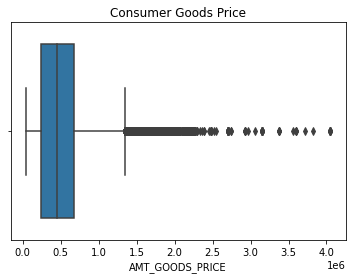

In [23]:
# Plotting boxplot to check for outliers and finding best option to impute
sns.boxplot( x ='AMT_GOODS_PRICE',data=application_data)
plt.title('Consumer Goods Price')
plt.show()

Since there are large no of outliers which canimpact mean, we can use median to impute  the null values

application_data['AMT_GOODS_PRICE'].fillna(application_data['AMT_GOODS_PRICE'].median(), inplace=True)

In [24]:
# Get the total count of null values for respective column in dataframe
application_data['AMT_ANNUITY'].isnull().sum()

12

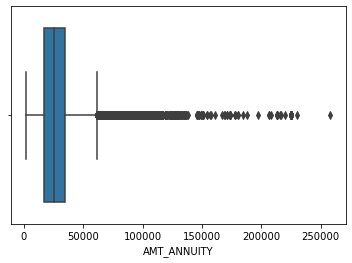

In [25]:
# Plotting boxplot to check for outliers and finding best option to impute
sns.boxplot( x ='AMT_ANNUITY',data=application_data)
plt.show()

Since there are large no of outliers, which can impact mean, we can use median to impute all the null values

application_data['AMT_ANNUITY'].fillna(application_data['AMT_ANNUITY'].median(), inplace=True)

#### CNT_FAM_MEMBERS

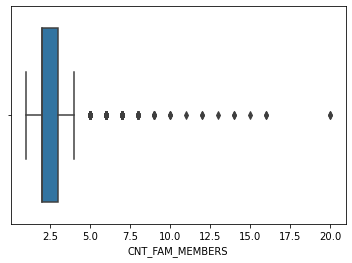

In [26]:
# Since this is count of family members, this is a continuous variable and we can impute the mean/median
sns.boxplot(application_data['CNT_FAM_MEMBERS'])
plt.show()

In [27]:
print(f'Since CNT_FAM_MEMBERS has outliers, the column can be imputed using the median of the column')

Since CNT_FAM_MEMBERS has outliers, the column can be imputed using the median of the column


### 3.3. Checking the datatypes

In [28]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [29]:
#changing the datatypes with float64 
application_data.select_dtypes(include='float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object')

In [30]:
convertCol=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
            'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_YEAR']


application_data.loc[:,convertCol]=application_data.loc[:,convertCol].apply(lambda col:col.astype('int',errors='ignore'))

In [31]:
#Checking the object type columns
application_data.select_dtypes(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'], dtype='object')

In [32]:
# convert the days employed to years and apply absolute function as its in negative form

application_data['YEARS WORKED'] = abs(round((application_data['DAYS_EMPLOYED'].replace('-',''))/365,2)).astype(int)

In [33]:
## Adding one more column that will be used for analysis later
application_data['CREDIT_INCOME_RATIO']=round((application_data['AMT_CREDIT']/application_data['AMT_INCOME_TOTAL']))

In [34]:
application_data.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  AMT_REQ_CREDIT_BUREAU_YEAR  YEARS WORKED  CREDIT_INCOME_RATIO
0      100002       1         Cash loans           M            N               Y             0            202500      406597     24700.50        351000.00   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment       -9461           -637              -3648        Laborers             1.00                     2                            2                           0                           0                            0                       0                       0                        0  Business Entity Type 3                        1.00             1                 2.00
1      100003       0         Cash loans           F            N               N             0            270000     1293502     35698.50       1129500.00          Family    State servant               Higher education               Married  House / apartment      -16765          -1188              -1186      Core staff             2.00                     1                            1                           0                           0                            0                       0                       0                        0                  School                        0.00             3                 5.00
2      100004       0    Revolving loans           M            Y               Y             0             67500      135000      6750.00        135000.00   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment      -19046           -225              -4260        Laborers             1.00                     2                            2                           0                           0                            0                       0                       0                        0              Government                        0.00             0                 2.00

In [35]:
#converting DAYS_BIRTH to year
application_data['DAYS_BIRTH'] = application_data['DAYS_BIRTH'].apply(lambda x: round(abs(x)/365),0)
application_data['DAYS_BIRTH']= pd.to_numeric(application_data['DAYS_BIRTH'])


### 3.4 Checking for outliers(5 variables)

In [36]:
application_data.describe().T

count      mean       std       min       25%       50%       75%          max
SK_ID_CURR                  307511.00 278180.52 102790.18 100002.00 189145.50 278202.00 367142.50    456255.00
TARGET                      307511.00      0.08      0.27      0.00      0.00      0.00      0.00         1.00
CNT_CHILDREN                307511.00      0.42      0.72      0.00      0.00      0.00      1.00        19.00
AMT_INCOME_TOTAL            307511.00 168797.92 237123.15  25650.00 112500.00 147150.00 202500.00 117000000.00
AMT_CREDIT                  307511.00 599025.95 402490.77  45000.00 270000.00 513531.00 808650.00   4050000.00
AMT_ANNUITY                 307499.00  27108.57  14493.74   1615.50  16524.00  24903.00  34596.00    258025.50
AMT_GOODS_PRICE             307233.00 538396.21 369446.46  40500.00 238500.00 450000.00 679500.00   4050000.00
DAYS_BIRTH                  307511.00     43.94     11.96     21.00     34.00     43.00     54.00        69.00
DAYS_EMPLOYED               307511.00  63815.05 141275.77 -17912.00  -2760.00  -1213.00   -289.00    365243.00
DAYS_REGISTRATION           307511.00  -4986.12   3522.89 -24672.00  -7479.50  -4504.00  -2010.00         0.00
CNT_FAM_MEMBERS             307509.00      2.15      0.91      1.00      2.00      2.00      3.00        20.00
REGION_RATING_CLIENT        307511.00      2.05      0.51      1.00      2.00      2.00      2.00         3.00
REGION_RATING_CLIENT_W_CITY 307511.00      2.03      0.50      1.00      2.00      2.00      2.00         3.00
REG_REGION_NOT_LIVE_REGION  307511.00      0.02      0.12      0.00      0.00      0.00      0.00         1.00
REG_REGION_NOT_WORK_REGION  307511.00      0.05      0.22      0.00      0.00      0.00      0.00         1.00
LIVE_REGION_NOT_WORK_REGION 307511.00      0.04      0.20      0.00      0.00      0.00      0.00         1.00
REG_CITY_NOT_LIVE_CITY      307511.00      0.08      0.27      0.00      0.00      0.00      0.00         1.00
REG_CITY_NOT_WORK_CITY      307511.00      0.23      0.42      0.00      0.00      0.00      0.00         1.00
LIVE_CITY_NOT_WORK_CITY     307511.00      0.18      0.38      0.00      0.00      0.00      0.00         1.00
AMT_REQ_CREDIT_BUREAU_YEAR  265992.00      1.90      1.87      0.00      0.00      1.00      3.00        25.00
YEARS WORKED                307511.00    185.02    381.97      0.00      2.00      6.00     15.00      1000.00
CREDIT_INCOME_RATIO         307511.00      3.96      2.71      0.00      2.00      3.00      5.00        85.00

AMT_GOODS_PRICE, Amt_credit  has a very high mean and can be further analysed for outliers.Also there are -ve values for Days_Birth, Days_ registration can be further analysed to see for any outliers

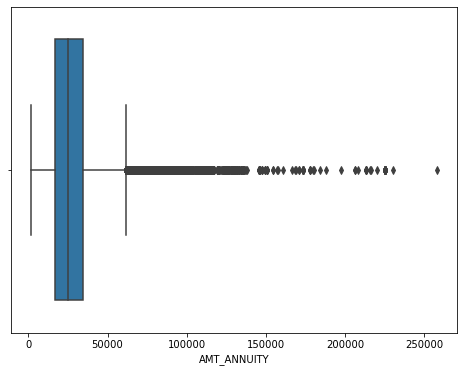

In [37]:
#Since AMT_ANNUITY is a continuous variable. So checking for outliers
plt.figure(figsize=(8,6))
sns.boxplot(application_data['AMT_ANNUITY'])
plt.show()

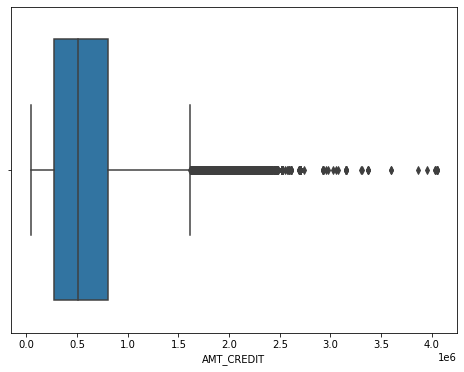

In [38]:
#Since AMT_CREDIT is a continuous variable. So checking for outliers
plt.figure(figsize=(8,6))
sns.boxplot(application_data['AMT_CREDIT'])
plt.show()

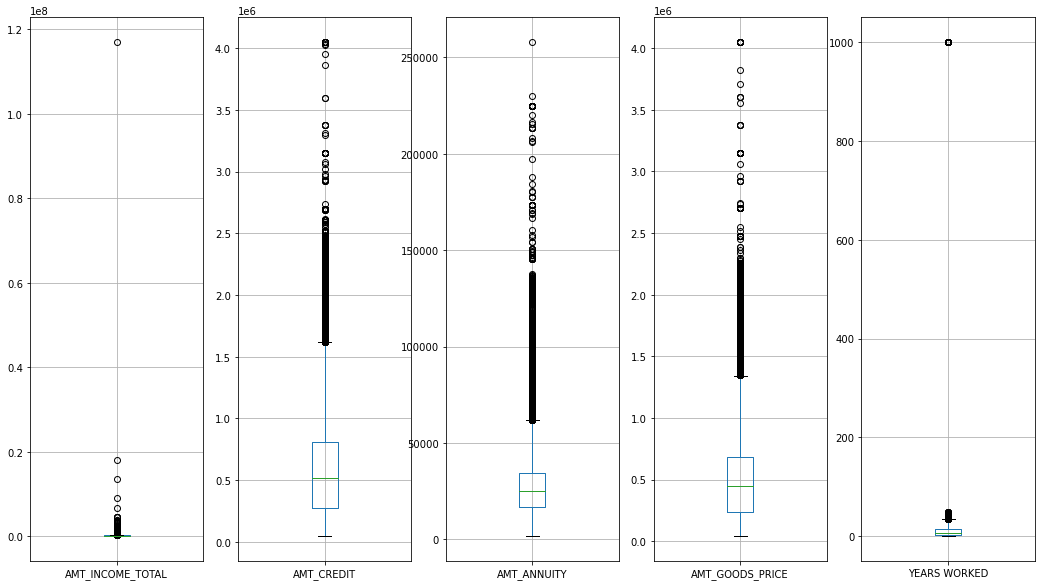

In [39]:
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS WORKED']
plt.figure(figsize=(18,10))
for i, col in enumerate(cols):
    plt.subplot(1,5, i+1)
    application_data.boxplot(column = col)
plt.show()

In the above box plot , We observe that AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE variables have huge outliers as we can see the spike at 100th percentile. 

So we can use 1.5 IQR rule to remove outliers.ie finding 25tha nd 75th quartile and arriving at IQR
 IQR = Q3-Q1

###  3.5 Binning of continous variables

##### Creating bins for income amount

In [40]:
print(application_data['AMT_INCOME_TOTAL'].describe())
q25 = application_data['AMT_INCOME_TOTAL'].quantile(0.25)
q60 = application_data['AMT_INCOME_TOTAL'].quantile(0.60)

q25,q60

count      307511.00
mean       168797.92
std        237123.15
min         25650.00
25%        112500.00
50%        147150.00
75%        202500.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64


(112500.0, 162000.0)

In [41]:
def income_category(value):
    if value <= q25:
        return 'Low'
    elif value > q25 and value <= q60:
        return 'Medium'
    else:
        return 'High'

application_data['INCOME_CATEGORY'] = application_data['AMT_INCOME_TOTAL'].apply(income_category)

In [42]:

# Creating age gategory groups
def age_category(value):
    if value <= 34:
        return 'Young'
    elif value > 35 and value <= 55:
        return 'Mid Age'
    else:
        return 'Old'
application_data['AGE_CATEGORY']=application_data['DAYS_BIRTH'].apply(age_category) 


Creating bins for Credit amount

In [43]:
print(round(application_data['AMT_CREDIT'].describe(),3))
q50 = application_data['AMT_CREDIT'].quantile(0.5)
q75 = application_data['AMT_CREDIT'].quantile(0.75)

q25,q60

count    307511.00
mean     599025.95
std      402490.77
min       45000.00
25%      270000.00
50%      513531.00
75%      808650.00
max     4050000.00
Name: AMT_CREDIT, dtype: float64


(112500.0, 162000.0)

In [44]:
# creating Credit amount groups
def credit_category(value):
    if value <= q50:
        return 'Low'
    elif value > q50 and value <= q75:
        return 'Medium'
    else:
        return 'High'

application_data['CREDIT_CATEGORY'] = application_data['AMT_CREDIT'].apply(credit_category)

 ####  Finding Imbalance Percentage in Target variable

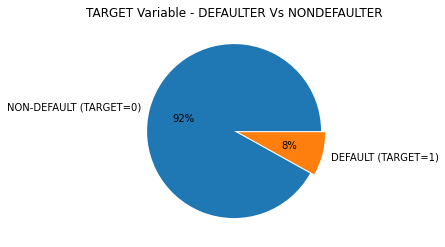

In [45]:
#Checking the Traget variable
plt.pie(application_data['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)',
                                     'DEFAULT (TARGET=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('TARGET Variable - DEFAULTER Vs NONDEFAULTER')
plt.show()

From above we conclude that there is an imbalance in the provided dataset as 92% of data is with Target-0 ie client  with no 
payment difficulty while the remaining 8% are clients with difficulty in payment.

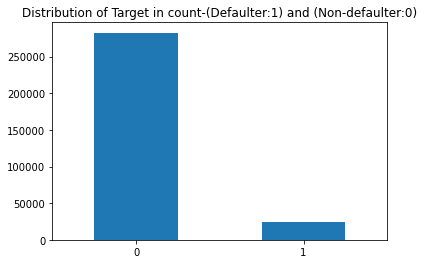

In [46]:
# graphical analysis of the share
application_data['TARGET'].value_counts().plot(kind='bar')
plt.title('Distribution of Target in count-(Defaulter:1) and (Non-defaulter:0)')
plt.xticks(rotation = 0)
plt.show()

### 4. Exploratory Data Analysis

In [47]:
#Lets divide the target group into two groups:

#creating dataframe with TARGET = 1 (payment defaulted)
target_default = application_data.loc[application_data['TARGET'] == 1]
print('Dimension of the default dataset',target_default.shape)
display(target_default.head())

print(                           )
#creating dataframe with TARGET = 0 (payment not defaulted)
target_nondefault = application_data.loc[application_data['TARGET'] == 0]
print('Dimension of the non-default dataset',target_nondefault.shape)
display(target_nondefault.head())

Dimension of the default dataset (24825, 36)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  AMT_REQ_CREDIT_BUREAU_YEAR  YEARS WORKED  CREDIT_INCOME_RATIO INCOME_CATEGORY AGE_CATEGORY CREDIT_CATEGORY
0       100002       1         Cash loans           M            N               Y             0            202500      406597     24700.50        351000.00   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment          26           -637              -3648        Laborers             1.00                     2                            2                           0                           0                            0                       0                       0                        0  Business Entity Type 3                        1.00             1                 2.00            High        Young             Low
26      100031       1         Cash loans           F            N               Y             0            112500      979992     27076.50        702000.00   Unaccompanied               Working  Secondary / secondary special                 Widow  House / apartment          51          -2628              -6573   Cooking staff             1.00                     3                            2                           0                           0                            0                       0                       0                        0  Business Entity Type 3                        2.00             7                 9.00             Low      Mid Age            High
40      100047       1         Cash loans           M            N               Y             0            202500     1193580     35028.00        855000.00   Unaccompanied  Commercial associate  Secondary / secondary special               Married  House / apartment          48          -1262              -1182        Laborers             2.00                     2                            2                           0                           0                            0                       0                       0                        0  Business Entity Type 3                        4.00             3                 6.00            High      Mid Age            High
42      100049       1         Cash loans           F            N               N             0            135000      288873     16258.50        238500.00   Unaccompanied               Working  Secondary / secondary special        Civil marriage  House / apartment          37          -3597                -45     Sales staff             2.00                     3                            3                           0                           0                            0                       0                       0                        0           Self-employed                        2.00             9                 2.00          Medium      Mid Age             Low
81      100096       1         Cash loans           F            N               Y             0             81000      252000     14593.50        252000.00   Unaccompanied             Pensioner  Secondary / secondary special               Married  House / apartment          68         365243              -5391             NaN             2.00                     2                            2                           0                           0                            0                       0                       0                        0               


Dimension of the non-default dataset (282686, 36)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  AMT_REQ_CREDIT_BUREAU_YEAR  YEARS WORKED  CREDIT_INCOME_RATIO INCOME_CATEGORY AGE_CATEGORY CREDIT_CATEGORY
1      100003       0         Cash loans           F            N               N             0            270000     1293502     35698.50       1129500.00           Family    State servant               Higher education               Married  House / apartment          46          -1188              -1186      Core staff             2.00                     1                            1                           0                           0                            0                       0                       0                        0                  School                        0.00             3                 5.00            High      Mid Age            High
2      100004       0    Revolving loans           M            Y               Y             0             67500      135000      6750.00        135000.00    Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment          52           -225              -4260        Laborers             1.00                     2                            2                           0                           0                            0                       0                       0                        0              Government                        0.00             0                 2.00             Low      Mid Age             Low
3      100006       0         Cash loans           F            N               Y             0            135000      312682     29686.50        297000.00    Unaccompanied          Working  Secondary / secondary special        Civil marriage  House / apartment          52          -3039              -9833        Laborers             2.00                     2                            2                           0                           0                            0                       0                       0                        0  Business Entity Type 3                         nan             8                 2.00          Medium      Mid Age             Low
4      100007       0         Cash loans           M            N               Y             0            121500      513000     21865.50        513000.00    Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment          55          -3038              -4311      Core staff             1.00                     2                            2                           0                           0                            0                       0                       1                        1                Religion                        0.00             8                 4.00          Medium      Mid Age             Low
5      100008       0         Cash loans           M            N               Y             0             99000      490495     27517.50        454500.00  Spouse, partner    State servant  Secondary / secondary special               Married  House / apartment          46          -1588              -4970        Laborers             2.00                     2                            2                           0                           0                            0                       0                       0                        0                   Other                    

In [48]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

round(len(target_nondefault)/len(target_default),2)

11.39

There is a large imbalance between the proportion of default (TARGET = 1) and non-default (TARGET = 0) in the dataset. The ratio of non-deafult to default is 11.39.

### 4.1 Univariate Analysis

#### a.Gender

Let's compare and check how the gender of client affects the repayment of loans.

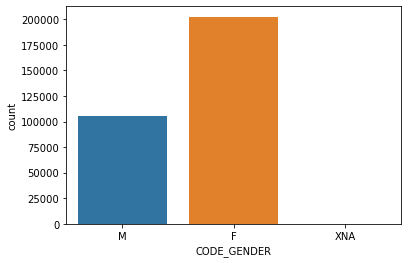

In [49]:
#graph to plot Males and femals in the entire polulation
Gender_vs_Total = sns.countplot("CODE_GENDER",data =application_data)

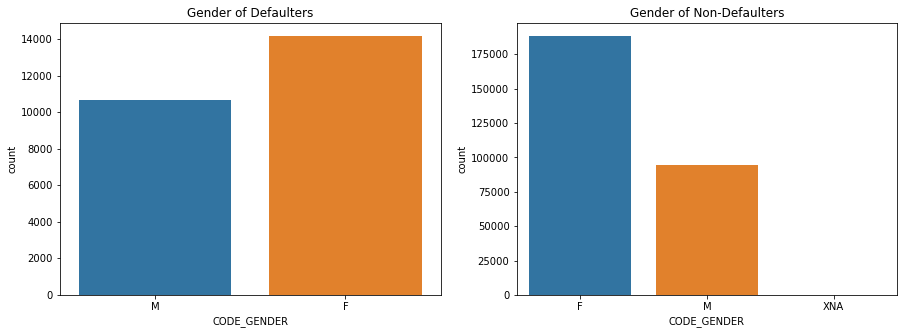

In [50]:

# plotting based on 'CODE_GENDER' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'CODE_GENDER', data = target_default)
plt.title('Gender of Defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'CODE_GENDER', data = target_nondefault)
plt.title('Gender of Non-Defaulters')

plt.show()

So, from above plots and data, we can clearly observe that number of Female clients are more in both the cases default/non-default. And the chances of default is lower among female applicants than that of the male.

#### b.Car Ownership

Let's compare and check how the car owners and non-car owners differ in their repayment of loans.

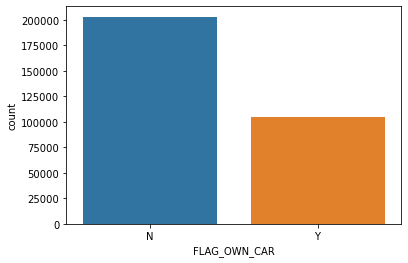

In [51]:
#graph to plot Males and femals in the entire polulation
Gender_vs_Total = sns.countplot("FLAG_OWN_CAR",data =application_data)


This shows that we have more applicants who do not own car


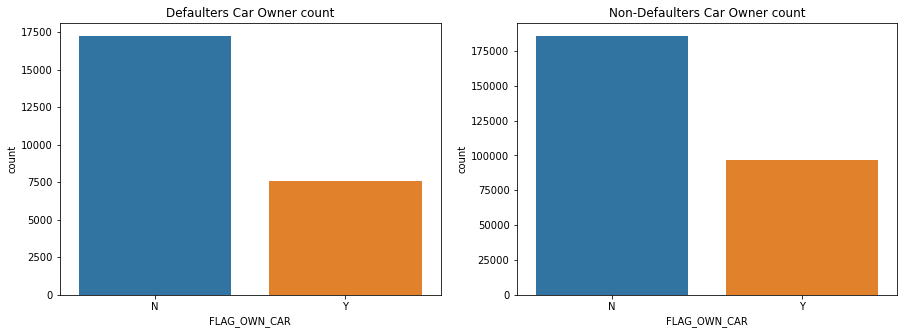

In [52]:
# plotting based on 'FLAG_OWN_CAR' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_CAR', data = target_default)
plt.title('Defaulters Car Owner count')

plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_CAR', data = target_nondefault)
plt.title('Non-Defaulters Car Owner count')

plt.show()

As we can see from above graph,the clients that own a car are less likely to not repay the loan when compared to the ones that do not own a car. 

#### c.Realty Ownership status

Let's compare and check how the family status of clients affect their repayment of loans.

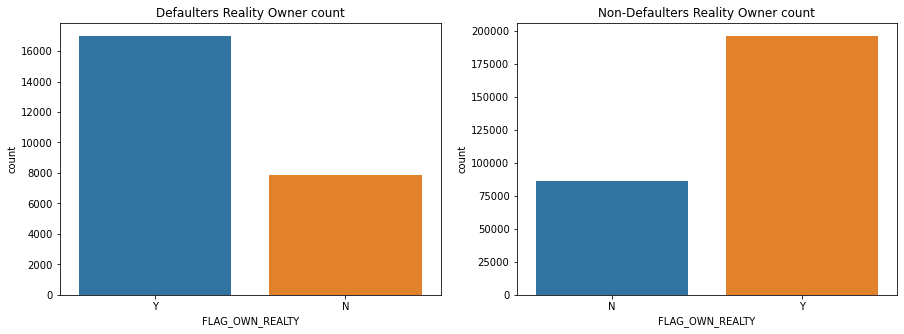

In [53]:
# plotting based on 'FLAG_OWN_REALTY' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_REALTY', data = target_default)
plt.title('Defaulters Reality Owner count')

plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_REALTY', data = target_nondefault)
plt.title('Non-Defaulters Reality Owner count')

plt.show()


Defalut/Non-default both the cases, the count of client who do own real estate is higher than who has not. Applicants with no realty ownership has a higher propensity to default than the clients who own real estate.

#### d.Contract Type

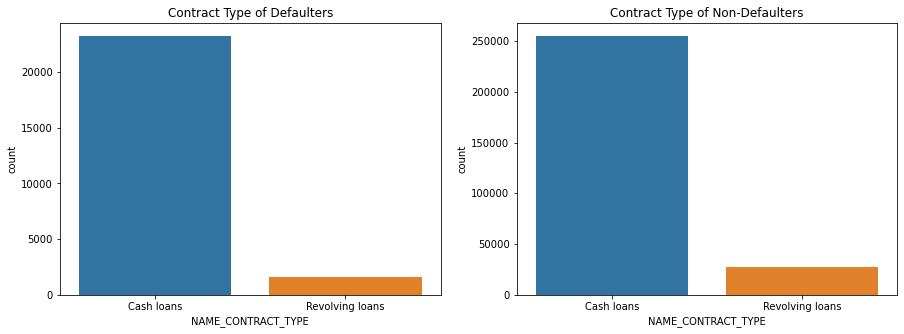

In [54]:
# plotting based on 'NAME_CONTRACT_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = target_default)
plt.title('Contract Type of Defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = target_nondefault)
plt.title('Contract Type of Non-Defaulters')

plt.show()

We observe that , the number of Cash loans applicants are higher in both default/ non-default cases than Revolving loans.

#### e.Name Income Type

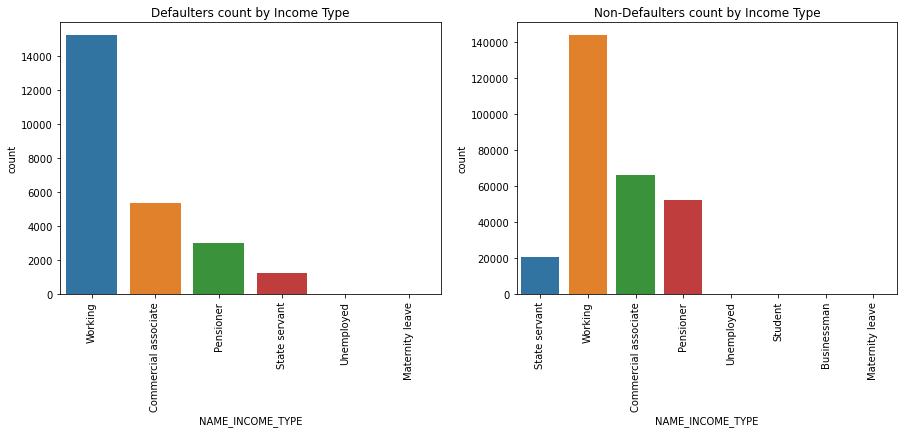

In [55]:
# plotting based on 'NAME_INCOME_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_INCOME_TYPE', data = target_default)
plt.xticks(rotation = 90)
plt.title('Defaulters count by Income Type')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_INCOME_TYPE', data = target_nondefault)
plt.xticks(rotation = 90)
plt.title('Non-Defaulters count by Income Type')

plt.show()

We observe that majority of the applicants are from working, commercial associate, pensioners and state servants. The remaining categories of income types are very small

#### f.Education Type

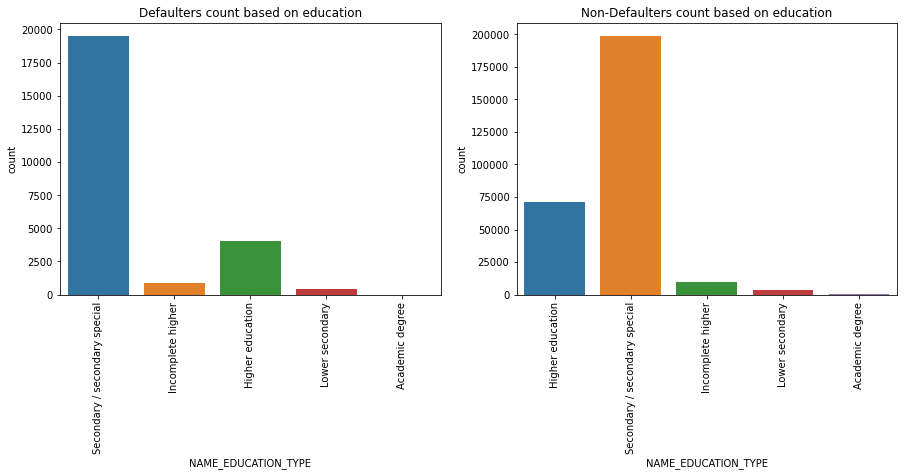

In [56]:
# plotting based on 'NAME_EDUCATION_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = target_default)
plt.xticks(rotation = 90)
plt.title('Defaulters count based on education')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = target_nondefault)
plt.xticks(rotation = 90)
plt.title('Non-Defaulters count based on education')

plt.show()

Applicants with secondary and higher secondary education are among the highest defaulters as well as not defaulters. Whereas, applicants with academic degrees are the smallest group of applicants that have applied for the loan and applicants from this background has no records of default. From the above figure, we see that a distinct pattern emerges. The chances of default is lower as the education level of the applicants increases.

#### g.Family Status

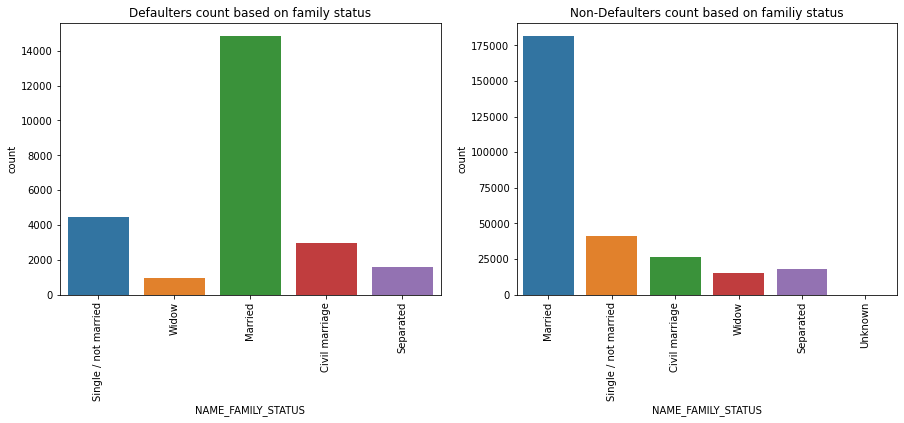

In [57]:
# plotting based on 'NAME_FAMILY_STATUS' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = target_default)
plt.xticks(rotation = 90)
plt.title('Defaulters count based on family status')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = target_nondefault)
plt.xticks(rotation = 90)
plt.title('Non-Defaulters count based on familiy status')

plt.show()

Applicants who are married are among the highest number of defaulters and non-defaulters. Whereas, widows are the lowest number of defaulters and non-defaulters.Which is interesting to see because you expect widows to not payback their loans but it is the opposite here.

#### h.Oraganization Type

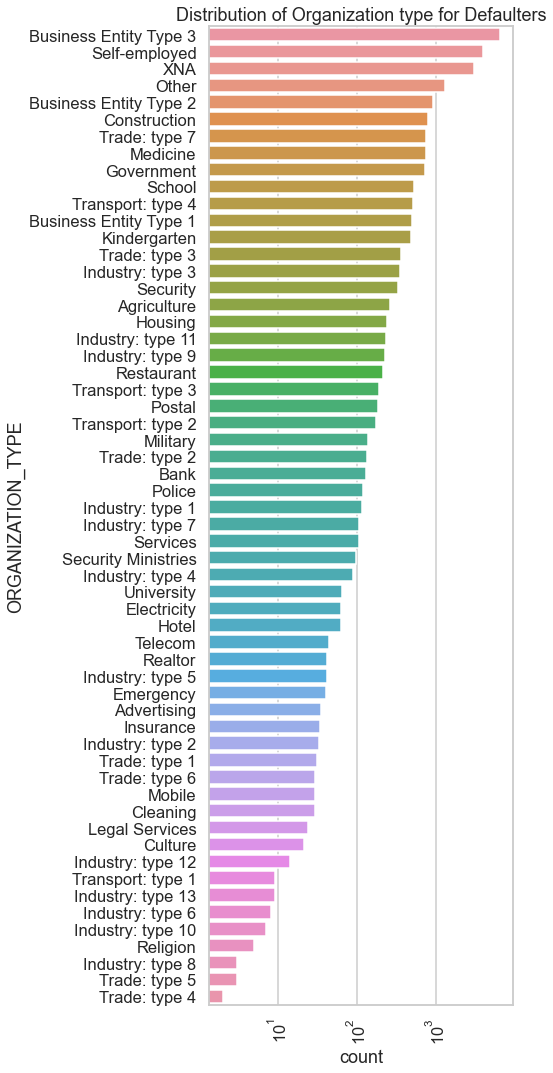

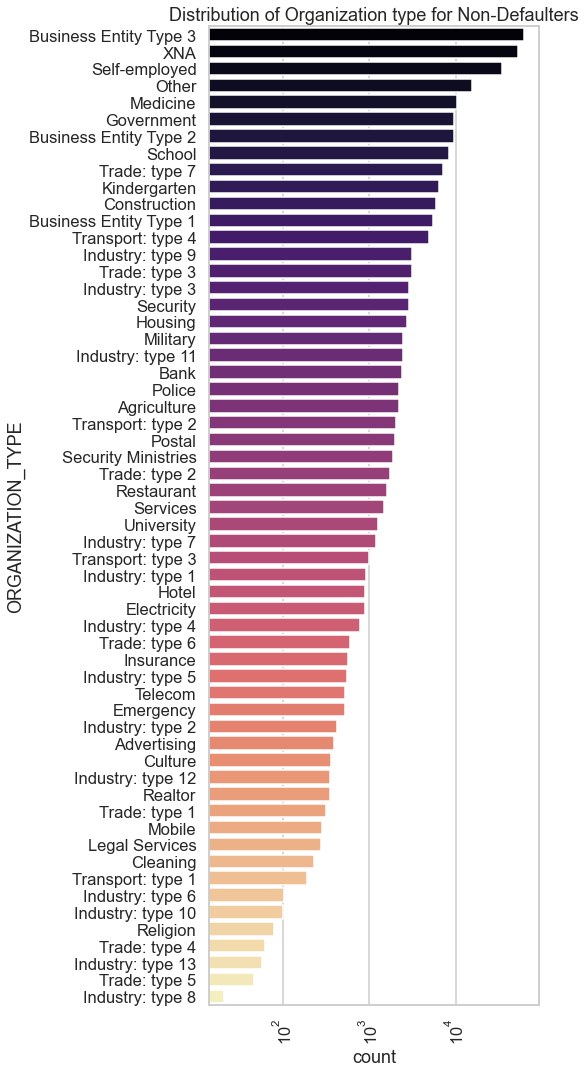

In [58]:

# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(12,18))
plt.subplot(1,2,1)
plt.title("Distribution of Organization type for Defaulters")
plt.xticks(rotation=90)
plt.xscale('log')
sns.countplot(data=target_default,y='ORGANIZATION_TYPE',order=target_default['ORGANIZATION_TYPE'].value_counts().index)
plt.show()




sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(13,18))
plt.subplot(1,2,2)
plt.title("Distribution of Organization type for Non-Defaulters")
plt.xticks(rotation=90)
plt.xscale('log')
sns.countplot(data=target_nondefault,y='ORGANIZATION_TYPE',order=target_nondefault['ORGANIZATION_TYPE'].value_counts().index,palette='magma')
plt.show()




Applicants who have applied for credits are from most of the organization type Business entity Type 3 , XNA(unknown), Self employed, Medicine and Other for both defaulters and non defaulters

Applicants are less from Industry type 8, Trade type 5, Industry type 13, Trade type 4 and religion for both defaulters and non defaulters.

Also with field we cannot make any conclusion as we find almost the same data for both the target set.


### 4.2 Univariate Analysis on continous columns

#### a. Family members count

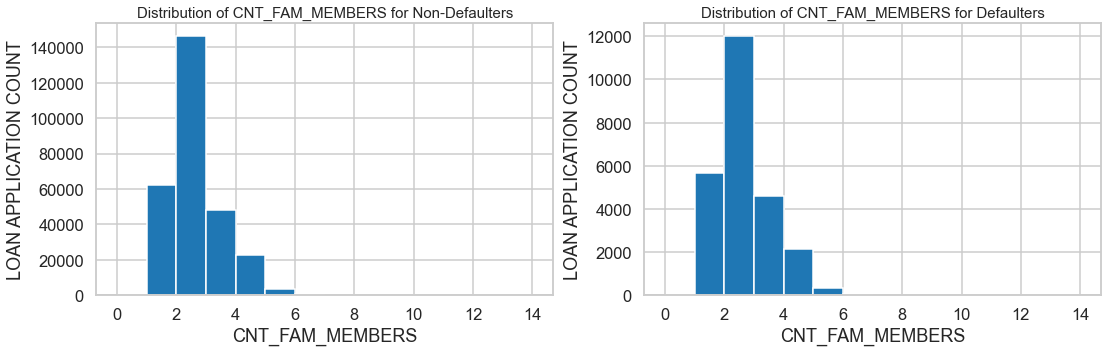

In [59]:
## function to dist plot for continuous variables
plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
target_nondefault['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('Distribution of CNT_FAM_MEMBERS for Non-Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')

plt.subplot(1, 2, 2)
target_default['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title(f'Distribution of CNT_FAM_MEMBERS for Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')  

plt.show()

We can see that a family of 3 applies loan more often than the other families

#### b. Credit - Income Ratio

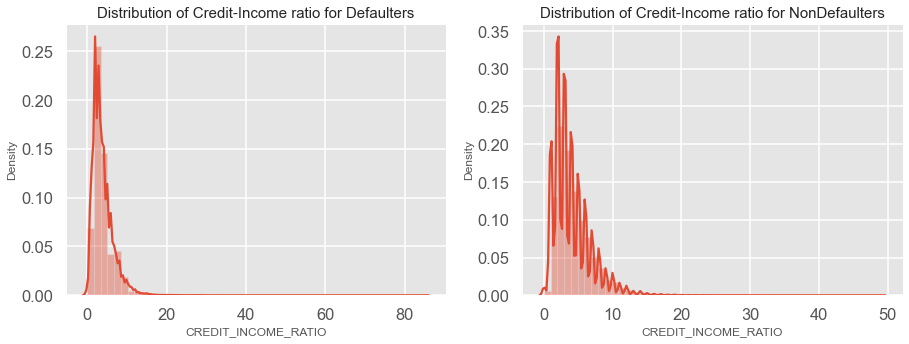

In [60]:
plt.style.use('ggplot')
    
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    
sns.distplot(a=target_default['CREDIT_INCOME_RATIO'],ax=ax1)
ax1.set_title('Distribution of Credit-Income ratio for Defaulters',fontsize=15)
            
sns.distplot(a=target_nondefault['CREDIT_INCOME_RATIO'],ax=ax2)
ax2.set_title('Distribution of Credit-Income ratio for NonDefaulters',fontsize=15)    
        
plt.show()

Credit income ratio the ratio of AMT_CREDIT/AMT_INCOME_TOTAL. 

Although there doesn't seem to be a clear distiguish between the group which defaulted vs the group which didn't when compared using the ratio, we can see that when the CREDIT_INCOME_RATIO is more than 50, people default.

####  c. Annuity Amount

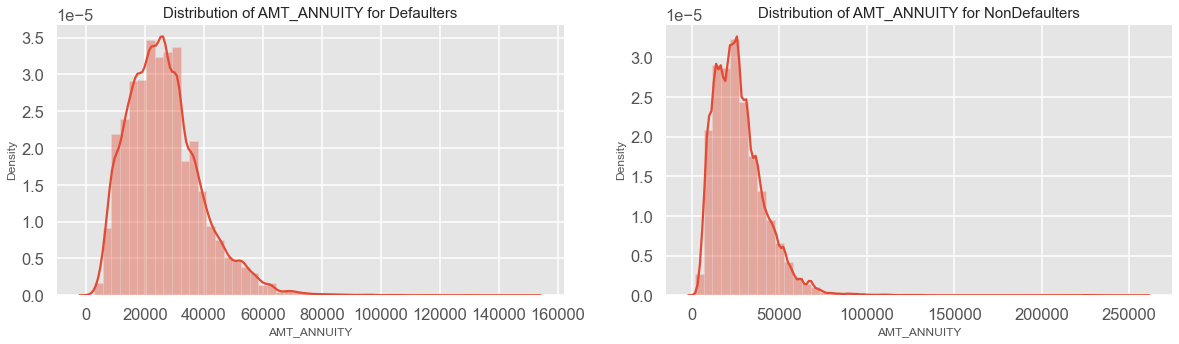

In [61]:
plt.style.use('ggplot')
    
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
    
sns.distplot(a=target_default['AMT_ANNUITY'],ax=ax1,kde=True)
ax1.set_title('Distribution of AMT_ANNUITY for Defaulters',fontsize=15)
            
sns.distplot(a=target_nondefault['AMT_ANNUITY'],ax=ax2,kde=True)
ax2.set_title('Distribution of AMT_ANNUITY for NonDefaulters',fontsize=15)    
        
plt.show()

The annuity amount in defaulters is between 20000 and 35000 whereas for non dafaulters it is between 30000 and 50000.The loan annuty is mostly concentrated within 10000 to 60000 range in both the cases.

#### d. Days Birth

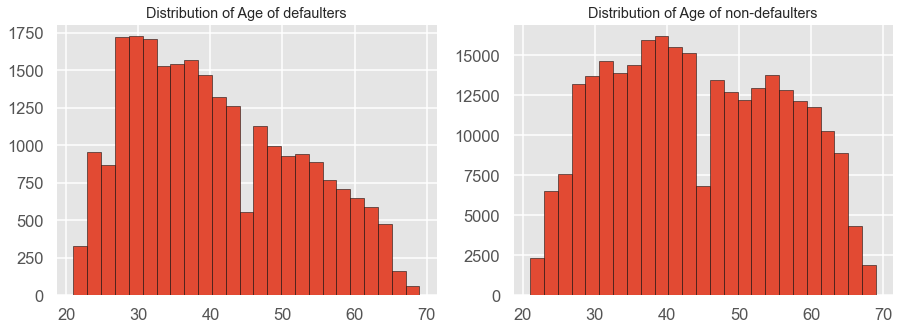

In [62]:
#plotting age 'DAYS_BIRTH' histogram
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(target_default['DAYS_BIRTH'], edgecolor = 'k', bins = 25)
plt.title('Distribution of Age of defaulters')
plt.subplot(1,2,2)
plt.hist(target_nondefault['DAYS_BIRTH'], edgecolor = 'k', bins = 25)
plt.title('Distribution of Age of non-defaulters')

plt.show()

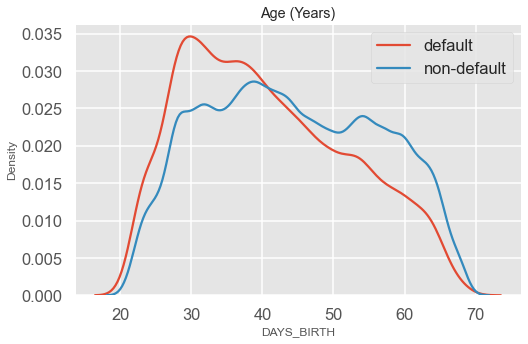

In [63]:
#plotting kde plot of 'DAYS_BIRTH'
plt.figure(figsize = (8,5))
sns.kdeplot(target_default['DAYS_BIRTH'], label = 'default')
sns.kdeplot(target_nondefault['DAYS_BIRTH'], label = 'non-default')
plt.title(r'Age (Years)')
plt.legend()
plt.show()

Around 29 years to 40 years people are more defaulters. There is high chance to be defaulted of the young people. Non-defaulted people are almost equally distributed.

#### e. Amount Credit

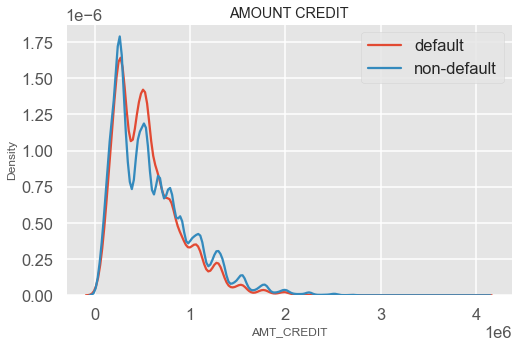

In [64]:
plt.figure(figsize = (8,5))
sns.kdeplot(target_default['AMT_CREDIT'], label = 'default')
sns.kdeplot(target_nondefault['AMT_CREDIT'], label = 'non-default')
plt.title('AMOUNT CREDIT')
plt.legend()
plt.show()

Here, we can see that the lesser loan credit amount, the higher the default chances. We can do bivariate analysis with Occupation Type to find out more insight.

## Segmented univariate analysis

#### a. Age and Income Category Segmented two variables

In [65]:
# target by days birth
c = pd.DataFrame(application_data.groupby(['AGE_CATEGORY','INCOME_CATEGORY'])['TARGET'].value_counts()/application_data.groupby(['AGE_CATEGORY','INCOME_CATEGORY'])['TARGET'].count())
c.columns = ['Per_Target']

target_by_ageinc = pd.pivot_table(c, values ='Per_Target', index =['AGE_CATEGORY','INCOME_CATEGORY'], 
                         columns =['TARGET'], aggfunc = np.sum) 
#target_by_creditinc = target_by_creditinc.sort_values([0])
# resetting index 
target_by_ageinc.drop(0, axis = 1, inplace = True)

target_by_ageinc1 = pd.pivot_table(target_by_ageinc, values = 1, index =['INCOME_CATEGORY'], 
                         columns =['AGE_CATEGORY'], aggfunc = np.sum) 

target_by_ageinc1

AGE_CATEGORY     Mid Age  Old  Young
INCOME_CATEGORY                     
High                0.07 0.06   0.09
Low                 0.08 0.06   0.12
Medium              0.08 0.06   0.11

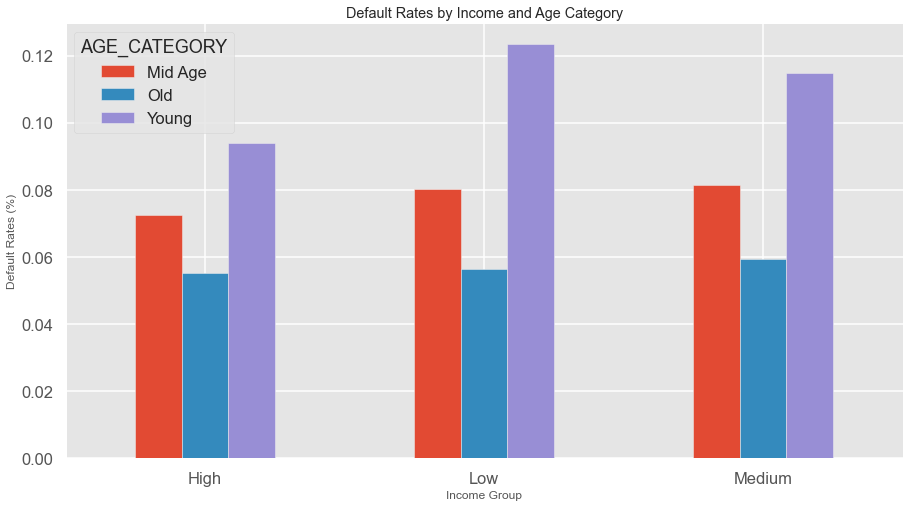

In [66]:
# figure
ax = target_by_ageinc1.plot(
    kind='bar',
    grid=True,
    figsize=(15, 8),
    title='Default Rates by Income and Age Category'
)

ax.set_xlabel("Income Group")
ax.set_ylabel('Default Rates (%)')
plt.xticks(rotation = 0)

plt.show()

We see from the above diagram that irrespective of the income groups, the chances of default decreases as the age of the applicants increases.

#### b. Income and Credit amount category two segmented

In [67]:

# target
c = pd.DataFrame(application_data.groupby(['INCOME_CATEGORY','CREDIT_CATEGORY'])['TARGET'].value_counts()/application_data.groupby(['INCOME_CATEGORY','CREDIT_CATEGORY'])['TARGET'].count())
c.columns = ['Per_Target']

target_by_creditinc = pd.pivot_table(c, values ='Per_Target', index =['INCOME_CATEGORY','CREDIT_CATEGORY'], 
                         columns =['TARGET'], aggfunc = np.sum) 
#target_by_creditinc = target_by_creditinc.sort_values([0])
# resetting index 
target_by_creditinc.drop(0, axis = 1, inplace = True)

target_by_creditinc1 = pd.pivot_table(target_by_creditinc, values = 1, index =['INCOME_CATEGORY'], 
                         columns =['CREDIT_CATEGORY'], aggfunc = np.sum) 


target_by_creditinc1

CREDIT_CATEGORY  High  Low  Medium
INCOME_CATEGORY                   
High             0.06 0.08    0.09
Low              0.07 0.08    0.09
Medium           0.07 0.09    0.09

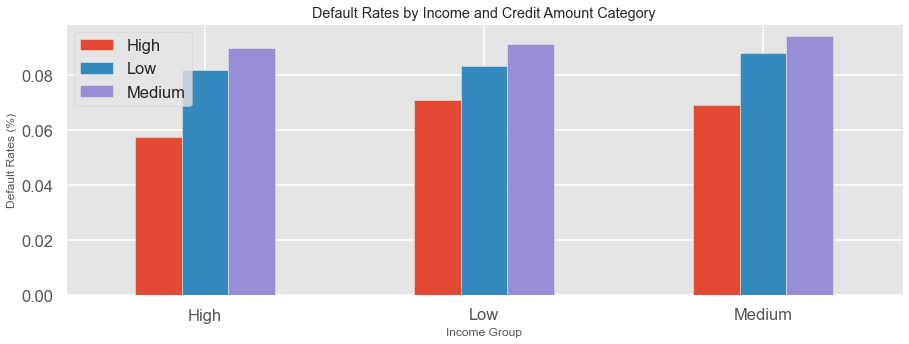

In [68]:
# figure
ax = target_by_creditinc1.plot(
    kind='bar',
    grid=True,
    figsize=(15,5),
    title='Default Rates by Income and Credit Amount Category'
)

ax.set_xlabel("Income Group")
ax.set_ylabel('Default Rates (%)')
plt.xticks(rotation = 0)
plt.legend (loc='upper left')
plt.show()



#### c. Income category for Defaulters and non defaulters

From the above plot, we find that irrespective of the income group, the chances of default increases as the credit amount increases. Also if we compare credit amount categories by different income groups, then the default rates for all the three credit amount categories are lower in the high income group relative to the medium and low income groups

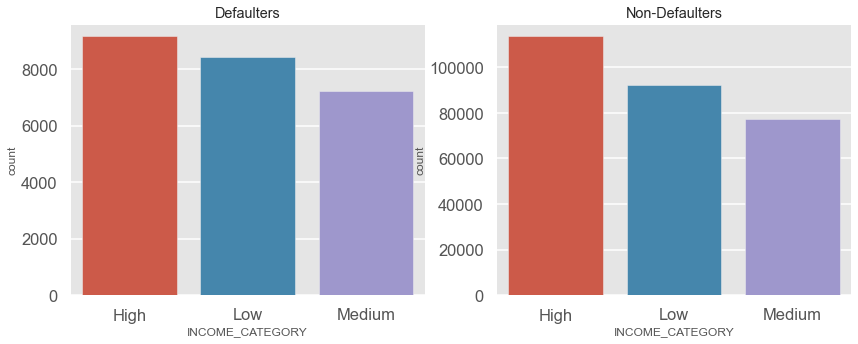

In [69]:
#plotting count plot on INCOME CATEGORY segments for both the default and non-default
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'INCOME_CATEGORY',data=target_default)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'INCOME_CATEGORY',data=target_nondefault)
plt.title('Non-Defaulters')
plt.show()

Nothing conclusive can be derived further. we can do bivariate analysis to see further.

#### d. Age category for Defaulters and non defaulters

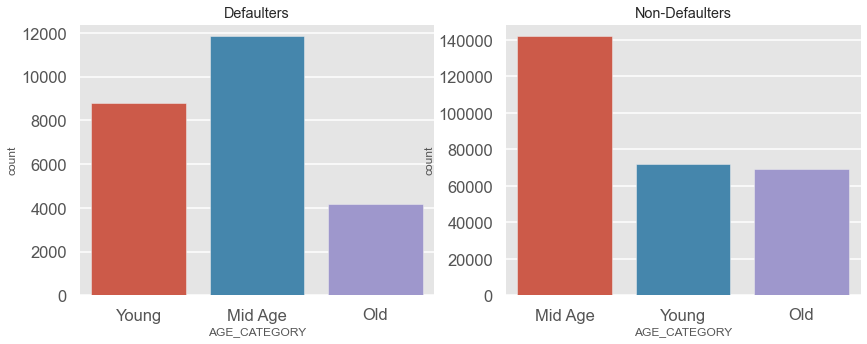

In [70]:
#plotting count plot on AGE_CATEGORY segments for both the default and non-default
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'AGE_CATEGORY',data=target_default)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'AGE_CATEGORY',data=target_nondefault)
plt.title('Non-Defaulters')
plt.show()

Mid age (35-55) age group of people are more likely to be defaulted followed by the young people.

#### e. Credit category for Defaulters and non defaulters

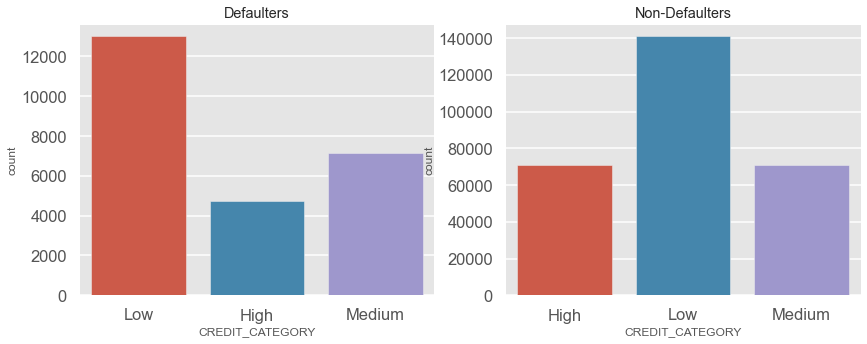

In [71]:
#plotting count plot on CREDIT_CATEGORY segments for both the default and non-default
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CREDIT_CATEGORY',data=target_default)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CREDIT_CATEGORY',data=target_nondefault)
plt.title('Non-Defaulters')
plt.show()

Low category of loan amount credited people are more likely to be defaulted than high amount loan credit.


#### f. Education Status Vs Gender wise defaulters

<Figure size 1008x360 with 0 Axes>

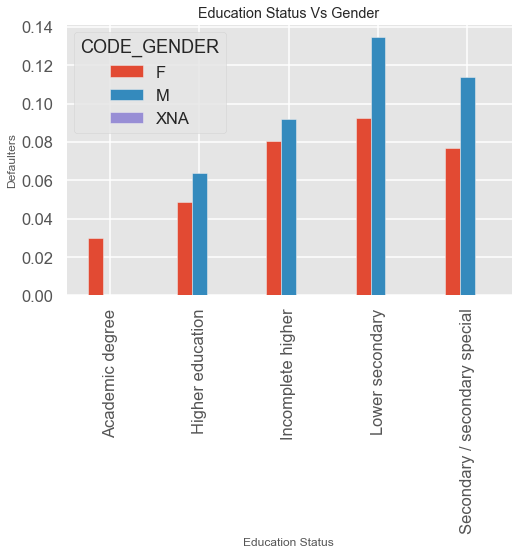

In [72]:
plt.figure(figsize=(14,5))
application_data.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Education Status')
plt.ylabel('Defaulters')
plt.title('Education Status Vs Gender')
plt.show()

Male with lower secondary education are more defaulted followed by Seconday/secondary special education.


#### g. Age Group Vs Gender

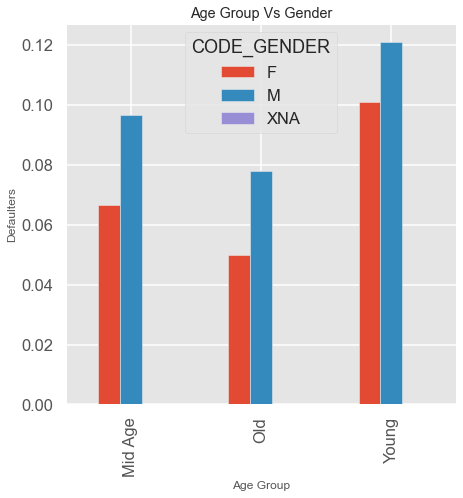

In [73]:
application_data.pivot_table(values='TARGET',index='AGE_CATEGORY',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(7,7))
plt.xlabel('Age Group')
plt.ylabel('Defaulters')
plt.title('Age Group Vs Gender')
plt.show()

Young male clients are more in number to be defaulted.

## 5 Bivariate Analysis

#### Defining correlation

In [74]:
#plottting correlation for Non defaulters
target_nondefault_corr = target_nondefault.iloc[0:, 2:].corr().abs()
target_nondefault_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  AMT_REQ_CREDIT_BUREAU_YEAR  YEARS WORKED  CREDIT_INCOME_RATIO
CNT_CHILDREN                         1.00              0.03        0.00         0.02             0.00        0.34           0.24               0.19             0.88                  0.02                         0.02                        0.01                        0.01                         0.02                    0.02                    0.07                     0.07                        0.04          0.25                 0.02
AMT_INCOME_TOTAL                     0.03              1.00        0.34         0.42             0.35        0.06           0.14               0.06             0.03                  0.19                         0.20                        0.07                        0.14                         0.13                    0.01                    0.02                     0.02                        0.03          0.14                 0.23
AMT_CREDIT                           0.00              0.34        1.00         0.77             0.99        0.05           0.07               0.01             0.06                  0.10                         0.11                        0.02                        0.05                         0.05                    0.03                    0.02                     0.00                        0.05          0.07                 0.65
AMT_ANNUITY                          0.02              0.42        0.77         1.00             0.78        0.01           0.11               0.04             0.08                  0.13                         0.15                        0.04                        0.08                         0.08                    0.01                    0.00                     0.01                        0.01          0.10                 0.39
AMT_GOODS_PRICE                      0.00              0.35        0.99         0.78             1.00        0.04           0.07               0.02             0.06                  0.10                         0.11                        0.03                        0.05                         0.05                    0.02                    0.02                     0.00                        0.05          0.07                 0.63
DAYS_BIRTH                           0.34              0.06        0.05         0.01             0.04        1.00           0.62               0.33             0.29                  0.00                         0.00                        0.07                        0.10                         0.07                    0.18                    0.24                     0.16                        0.07          0.63                 0.12
DAYS_EMPLOYED                        0.24              0.14        0.07         0.11             0.07        0.62           1.00               0.21             0.24                  0.04                         0.04                        0.04                        0.11                         0.10                    0.09                    0.25                     0.22                        0.05          1.00                 0.07
DAYS_REGISTRATION                    0.19              0.06        0.01         0.04             0.02        0.33           0.21               1.00             0.18                  0.08                         0.07                        0.03                        0.04                         0.03                    0.06                    0.10                     0.07                        0.03          0.21                 0.04
CNT_FAM_MEMBERS                      0.88              0.03        0.06         0.08            

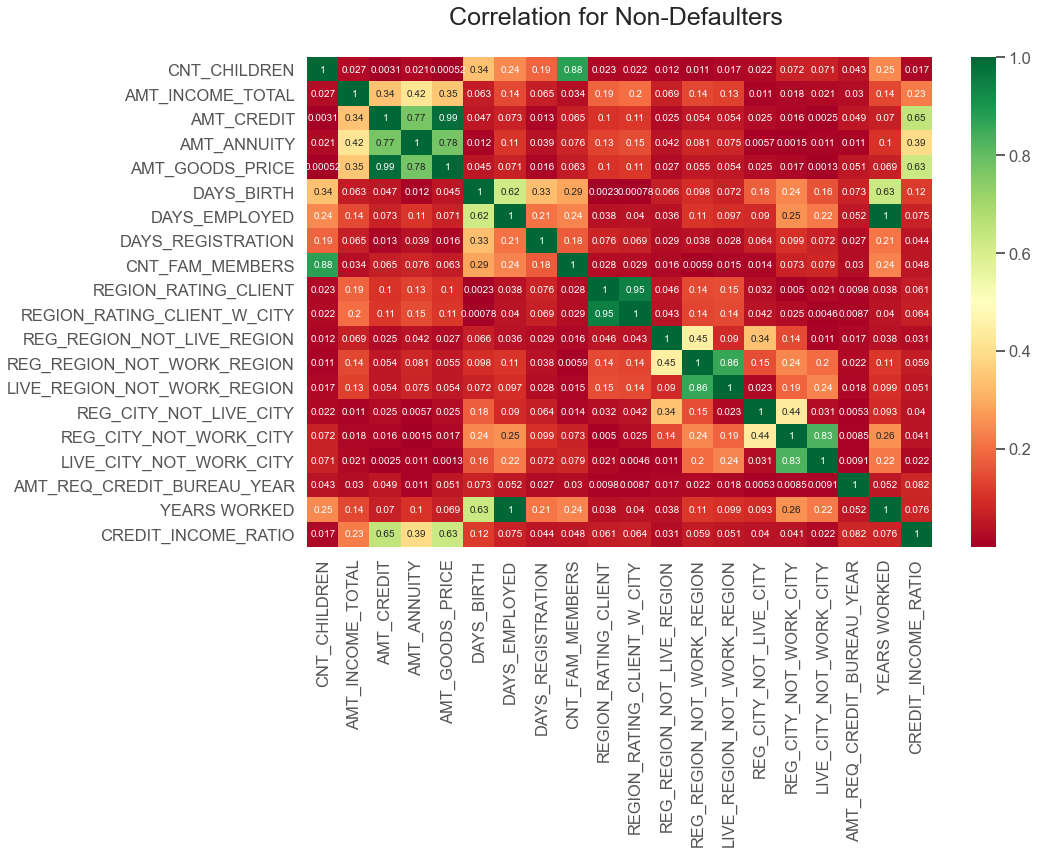

In [75]:
#Plotting the correlation for the Target_nondefault.
plt.figure(figsize=[14,9])
sns.heatmap(target_nondefault_corr, annot=True, cmap='RdYlGn')
plt.title('Correlation for Non-Defaulters \n', fontsize=25)
plt.show()

Conclusions from the graph:

1. Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
2. Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
3. Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
4. Less children client have in densely populated area.
5. Credit amount is higher to densely populated area.
6. The income is also higher in densely populated area.

#### Calculating the correlation among the Defaulters people

In [76]:
target_default_corr = target_default.iloc[0:, 2:].corr()
target_default_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  AMT_REQ_CREDIT_BUREAU_YEAR  YEARS WORKED  CREDIT_INCOME_RATIO
CNT_CHILDREN                         1.00              0.00       -0.00         0.03            -0.01       -0.26          -0.19               0.15             0.89                  0.04                         0.04                       -0.02                       -0.02                        -0.01                   -0.00                    0.05                     0.05                       -0.04         -0.19                 0.00
AMT_INCOME_TOTAL                     0.00              1.00        0.04         0.05             0.04       -0.00          -0.01               0.00             0.01                 -0.02                        -0.02                        0.01                        0.01                         0.01                   -0.00                   -0.00                    -0.00                        0.00         -0.01                -0.04
AMT_CREDIT                          -0.00              0.04        1.00         0.75             0.98        0.14          -0.00              -0.03             0.05                 -0.06                        -0.07                        0.02                        0.03                         0.03                   -0.03                   -0.04                    -0.02                       -0.04          0.00                 0.64
AMT_ANNUITY                          0.03              0.05        0.75         1.00             0.75        0.01          -0.08               0.03             0.08                 -0.07                        -0.09                        0.03                        0.07                         0.06                   -0.01                    0.00                     0.01                       -0.01         -0.08                 0.38
AMT_GOODS_PRICE                     -0.01              0.04        0.98         0.75             1.00        0.14           0.00              -0.03             0.05                 -0.07                        -0.08                        0.02                        0.04                         0.04                   -0.03                   -0.04                    -0.02                       -0.04          0.01                 0.62
DAYS_BIRTH                          -0.26             -0.00        0.14         0.01             0.14        1.00           0.57              -0.29            -0.20                 -0.03                        -0.03                       -0.05                       -0.07                        -0.05                   -0.16                   -0.22                    -0.12                        0.08          0.58                 0.16
DAYS_EMPLOYED                       -0.19             -0.01       -0.00        -0.08             0.00        0.57           1.00              -0.19            -0.19                  0.00                         0.00                       -0.03                       -0.09                        -0.08                   -0.08                   -0.24                    -0.20                        0.04          1.00                 0.12
DAYS_REGISTRATION                    0.15              0.00       -0.03         0.03            -0.03       -0.29          -0.19               1.00             0.15                  0.10                         0.10                        0.02                        0.02                         0.02                    0.05                    0.09                     0.06                       -0.01         -0.19                -0.06
CNT_FAM_MEMBERS                      0.89              0.01        0.05         0.08            

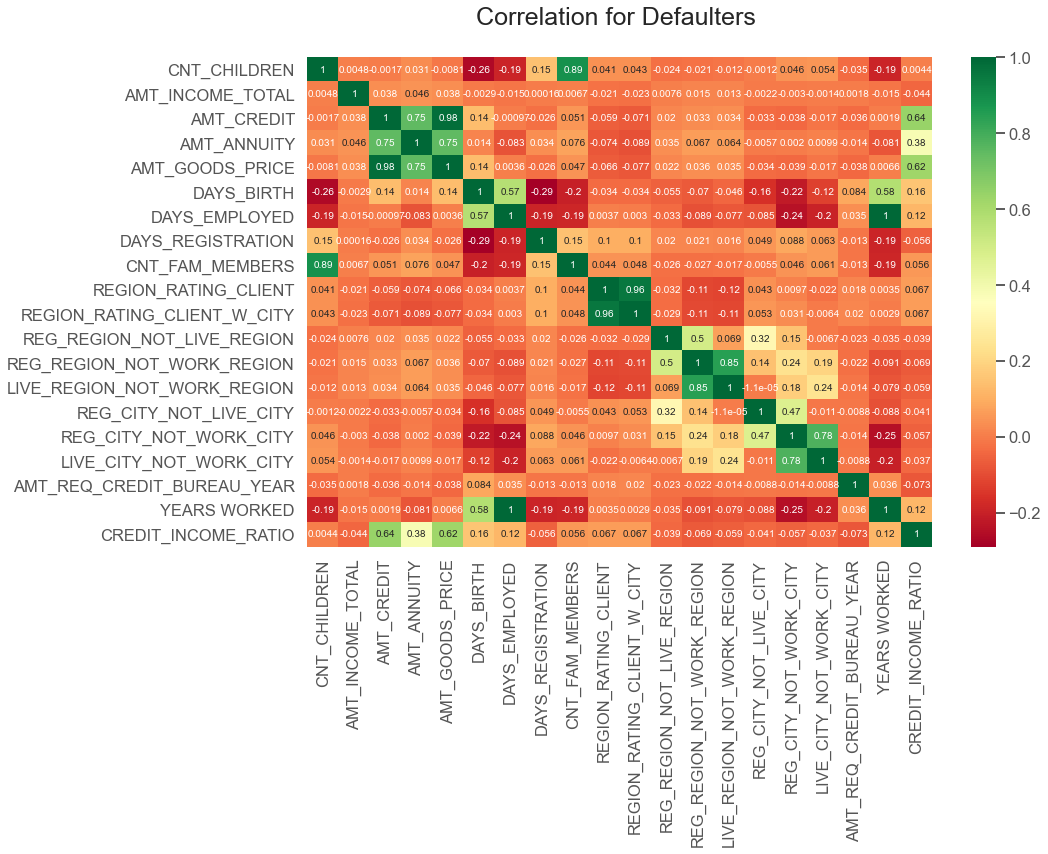

In [77]:
#Plotting heatmap to find the correlation for the Default.
plt.figure(figsize=[14,9])
sns.heatmap(target_default_corr, annot=True, cmap='RdYlGn')
plt.title('Correlation for Defaulters \n', fontsize=25)
plt.show()


Conclusion from graph

We found similiar infernce in defaulters which we saw in Nondefaulters,inaddition to below 

1. The client's permanent address does not match contact address are having less children and vice-versa
2. The client's permanent address does not match work address are having less children and vice-versa

### Finding Top 10 Correlation  for defaulters and Nondefaulters

In [78]:
# getting top 10 correlation in Defaulters

corr=target_default.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

Column1                     Column2  Correlation  Abs_Correlation
448                 YEARS WORKED               DAYS_EMPLOYED         1.00             1.00
136              AMT_GOODS_PRICE                  AMT_CREDIT         0.98             0.98
275  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.96             0.96
222              CNT_FAM_MEMBERS                CNT_CHILDREN         0.89             0.89
344  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.85             0.85
413      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.78             0.78
137              AMT_GOODS_PRICE                 AMT_ANNUITY         0.75             0.75
114                  AMT_ANNUITY                  AMT_CREDIT         0.75             0.75
466          CREDIT_INCOME_RATIO                  AMT_CREDIT         0.64             0.64
468          CREDIT_INCOME_RATIO             AMT_GOODS_PRICE         0.62             0.62

In [79]:
# Getting top 10 correlation in NonDefaulters

corr=target_nondefault.corr()
corr_nondf = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_nondf.columns=['Column1','Column2','Correlation']
corr_nondf.dropna(subset=['Correlation'],inplace=True)
corr_nondf['Abs_Correlation']=corr_nondf['Correlation'].abs()
corr_nondf = corr_nondf.sort_values(by=['Abs_Correlation'], ascending=False)
corr_nondf.head(10)

Column1                     Column2  Correlation  Abs_Correlation
448                 YEARS WORKED               DAYS_EMPLOYED         1.00             1.00
136              AMT_GOODS_PRICE                  AMT_CREDIT         0.99             0.99
275  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.95             0.95
222              CNT_FAM_MEMBERS                CNT_CHILDREN         0.88             0.88
344  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.86             0.86
413      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.83             0.83
137              AMT_GOODS_PRICE                 AMT_ANNUITY         0.78             0.78
114                  AMT_ANNUITY                  AMT_CREDIT         0.77             0.77
466          CREDIT_INCOME_RATIO                  AMT_CREDIT         0.65             0.65
468          CREDIT_INCOME_RATIO             AMT_GOODS_PRICE         0.63             0.63

#### Correlation of the continuous variables of Defaulter data frame

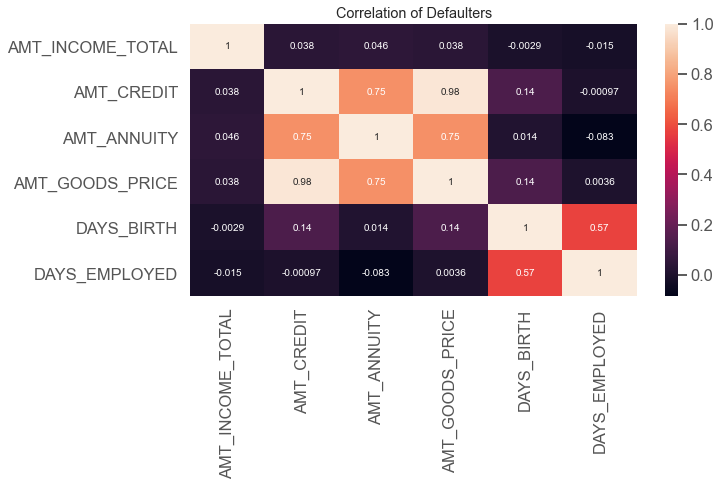

In [80]:

# plotting heatmap where TARGET = 1
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
              ]
cor = target_default[cols].corr()
plt.figure(figsize = (10,5))
sns.heatmap(cor, annot = True)
plt.title('Correlation of Defaulters')
plt.show()

We can see that GOODS_PRICE and AMT_CREDIT, AMT_ANNUTY and AMT_AMT_CREDIT are highly correlated.

#### Correlation of the continuous variables of Non-Defaulter data frame

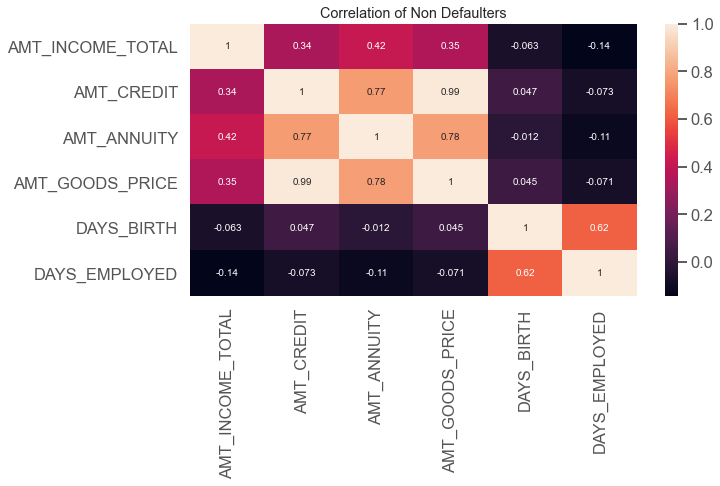

In [81]:
# plotting heatmap where TARGET = 0
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
              ]
cor = target_nondefault[cols].corr()
plt.figure(figsize = (10,5))
sns.heatmap(cor, annot = True)
plt.title('Correlation of Non Defaulters')
plt.show()

We can see that GOODS_PRICE and AMT_CREDIT, AMT_ANNUTY and AMT_AMT_CREDIT are mederately correlated with each other.

### Bivariate Analysis on continous columns

#### a. Credit and Income

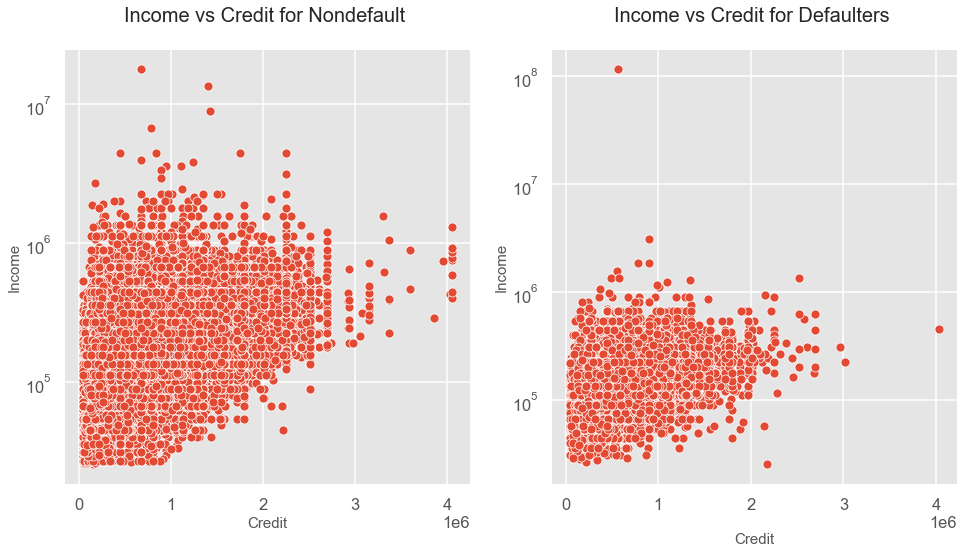

In [82]:
# Plotting scatterplot to find any correlations and to check the trends 
plt.figure(figsize=[16,8])
plt.subplot(1,2,1)
sns.scatterplot(target_nondefault.AMT_CREDIT, target_nondefault.AMT_INCOME_TOTAL)
plt.title('Income vs Credit for Nondefault \n', fontsize=20)
plt.yscale('log')
plt.xlabel('Credit', fontsize=15)
plt.ylabel('Income', fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot(target_default.AMT_CREDIT, target_default.AMT_INCOME_TOTAL)
plt.title('Income vs Credit for Defaulters \n', fontsize=20)
plt.yscale('log')
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nIncome', fontsize=15)
plt.show()

There is a positive correlation between Income and Credit  since  the plotted points are distributed from lower left corner to upper right corner 

#### b. Credit and Goods Price

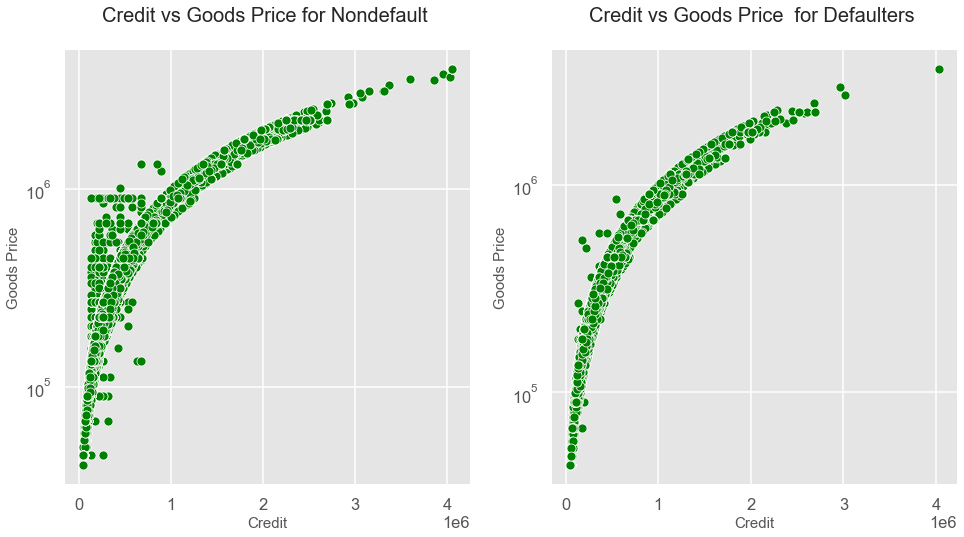

In [83]:


plt.figure(figsize=[16,8])
plt.subplot(1,2,1)
sns.scatterplot( x='AMT_CREDIT',y='AMT_GOODS_PRICE',data = target_nondefault,color = 'g')
plt.title('Credit vs Goods Price for Nondefault \n', fontsize=20)
plt.yscale('log')
plt.xlabel('Credit', fontsize=15)
plt.ylabel('Goods Price', fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot( x='AMT_CREDIT',y='AMT_GOODS_PRICE',data = target_default,color = 'g')
plt.title('Credit vs Goods Price  for Defaulters \n', fontsize=20)
plt.yscale('log')
plt.xlabel('Credit', fontsize=15)
plt.ylabel('Goods Price', fontsize=15)
plt.show()

Since the plots are scattered  from left corner to uuper right corner , we can conclude taht there is a positive correlation between the two variables which means if  there is increase in goods price,the credit also increases directly and vice versa.


## Bivariate analysis on categorical columns

#### a. Salary vs Client whose Permanent Address not match with Contact Address -Region Level

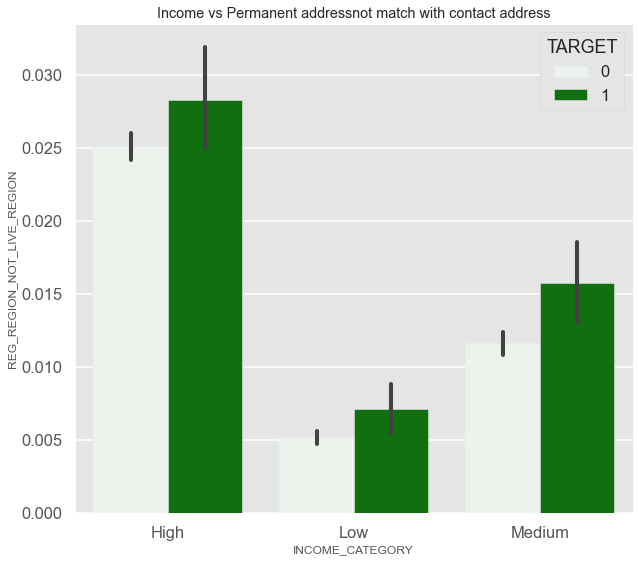

In [84]:
#plotting for salry and reg_not live region
f, ax = plt.subplots(figsize=(10,9))
plot_1=sns.barplot('INCOME_CATEGORY','REG_REGION_NOT_LIVE_REGION',data=application_data,hue="TARGET",color ='green')
plt.title('Income vs Permanent addressnot match with contact address')
plt.show()

When Client gets Extremply lower salary and if his/her address doest match, then there is a Higher chance for him/her to be defaulter

#### b. Salary vs Client whose Permanent Address not match with Work Address - Region Level

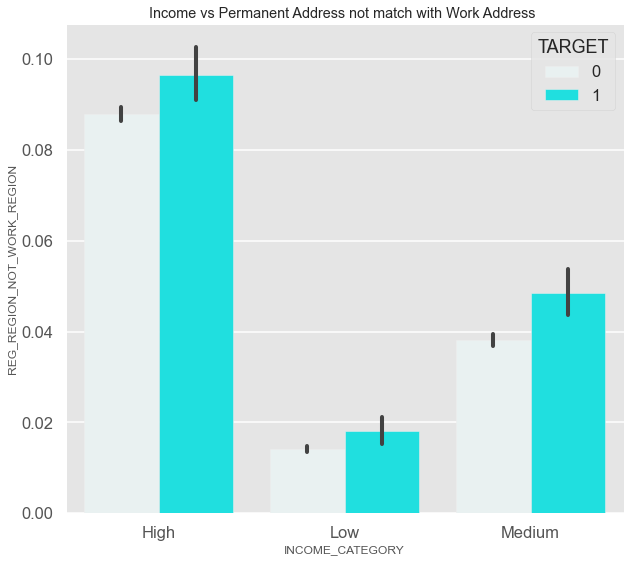

In [85]:

f, ax = plt.subplots(figsize=(10,9))
plot_1=sns.barplot("INCOME_CATEGORY","REG_REGION_NOT_WORK_REGION",data=application_data,hue="TARGET",color = 'cyan')
plt.title('Income vs Permanent Address not match with Work Address ')
plt.show()

#### c.Income type and countChildren

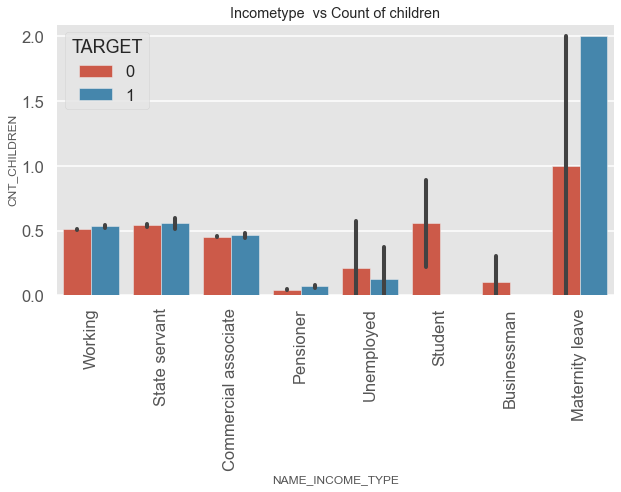

In [86]:
# Incometype  vs count of children
f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot("NAME_INCOME_TYPE","CNT_CHILDREN",data=application_data,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)
plt.title('Incometype  vs Count of children')
plt.show()

It is interesting to note that applicants who are going on maternity leave can be defaulters and also non defaulters.Probably because the income is via Maternity Leave  and tends to be more Defaulter when they have more children

#### d.Income Type and Permanent Address not match with Contact Address

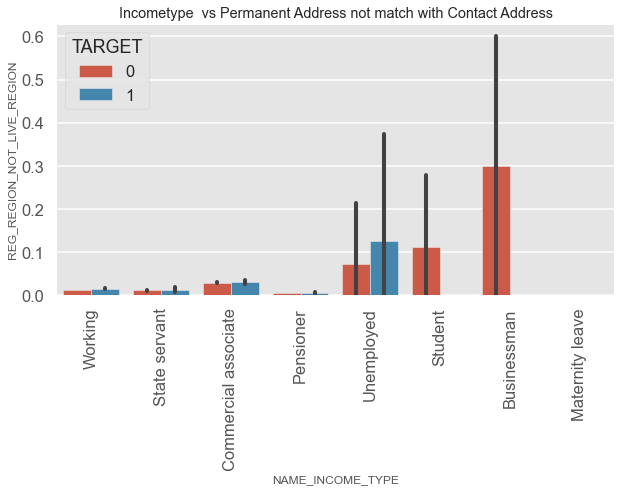

In [87]:
f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot("NAME_INCOME_TYPE","REG_REGION_NOT_LIVE_REGION",data=application_data,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)
plt.title('Incometype  vs Permanent Address not match with Contact Address')
plt.show()

Applicants who are Unemployed has more chance to be a defaulter , when their Permanent Address does not match with the Contact Address in the Regional Level

#### e. Family Status vs Count of children

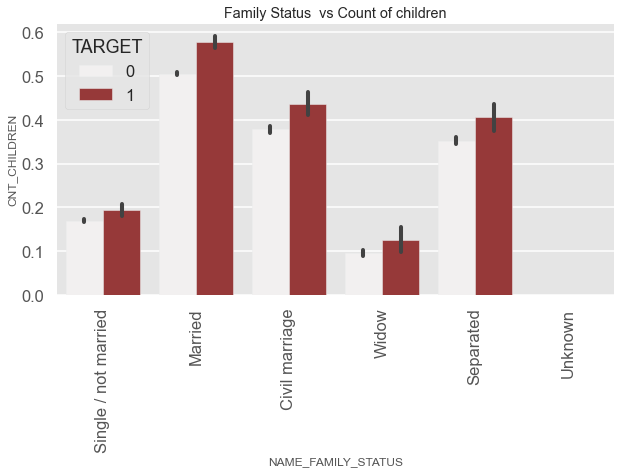

In [88]:
f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot("NAME_FAMILY_STATUS","CNT_CHILDREN",data=application_data,hue="TARGET",color='brown')
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)
plt.title('Family Status  vs Count of children')
plt.show()


Applicants who are married and have more children (5+), chances to be a defaulter in High. This may be due to the Economic situation of their family, because of more children

#### f. Family Status vs Count Of Family Members

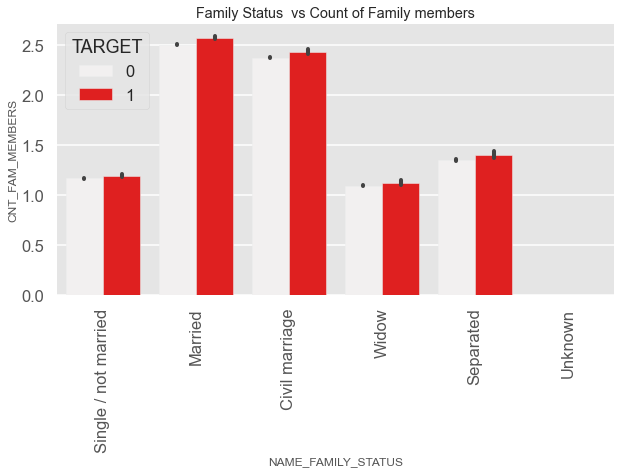

In [89]:
f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot("NAME_FAMILY_STATUS","CNT_FAM_MEMBERS",data=application_data,hue="TARGET",color='red')
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)
plt.title('Family Status  vs Count of Family members')
plt.show()

Applicants who are married with family of 3 or more tend to be defaulters.This may be due to the Economic situation of their family, because of more members

In [90]:
categories = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
               'NAME_EDUCATION_TYPE',  'NAME_HOUSING_TYPE', 'INCOME_CATEGORY', 
               'AGE_CATEGORY']

## Finding Outliers

#### Univariate Analysis

##### Non Defaulters (target = 0)

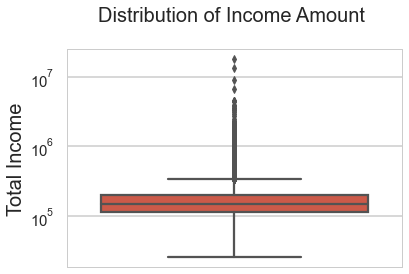

In [91]:
# Distribution of Income Amount,
sns.set_style('whitegrid')
sns.boxplot(data=target_nondefault, y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Income', fontsize=20)
plt.title('Distribution of Income Amount \n', fontsize=20)
plt.show()

We observe that outliers are present and seems like an equal distribution of income amount of the applicants

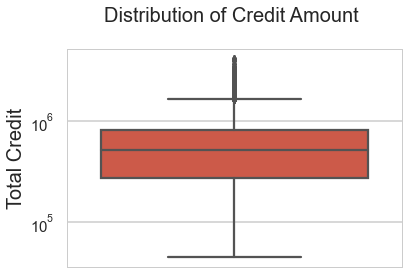

In [92]:
# Distribution of Credit Amount,
sns.set_style('whitegrid')
sns.boxplot(data=target_nondefault, y='AMT_CREDIT')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Credit', fontsize=20)
plt.title('Distribution of Credit Amount \n', fontsize=20)
plt.show()

There is outlier in the 100th quartile and also the  first quartile is bigger than the third quartile, that means most of the
 applicants credit lies in the first quartile

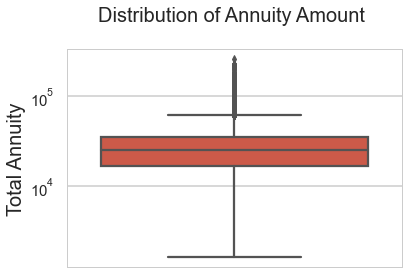

In [93]:

# Distribution of Annuity,
sns.set_style('whitegrid')
sns.boxplot(data=target_nondefault, y='AMT_ANNUITY')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Annuity', fontsize=20)
plt.title('Distribution of Annuity Amount \n', fontsize=20)
plt.show()


We observe there is some outliers and the first quartile is bigger than the third quartile.

##### For Defaulters (target=1)


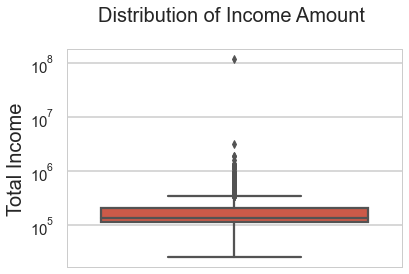

In [94]:
# Distribution of Income Amount,
sns.set_style('whitegrid')
sns.boxplot(data=target_default, y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Income', fontsize=20)
plt.title('Distribution of Income Amount \n', fontsize=20)
plt.show()

There seems to be a significant outlier in income amount. Majority of the income is in the third quartile

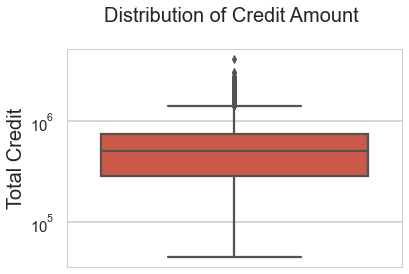

In [95]:
# Distribution of Credit Amount,
sns.set_style('whitegrid')
sns.boxplot(data=target_default, y='AMT_CREDIT')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Credit', fontsize=20)
plt.title('Distribution of Credit Amount \n', fontsize=20)
plt.show()

There seems some outliers in the Credit boxplot.The first quartile is bigger than the third quartile, that means most of the
client credit lies in the first quartile.


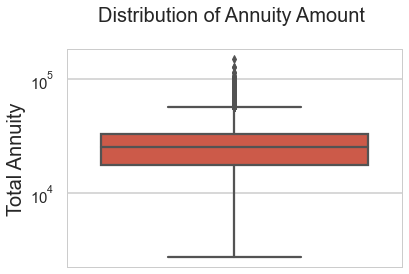

In [96]:
# Distribution of Annuity,
sns.set_style('whitegrid')
sns.boxplot(data=target_default, y='AMT_ANNUITY')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Annuity', fontsize=20)
plt.title('Distribution of Annuity Amount \n', fontsize=20)
plt.show()

    
We observe that the first quartile is bigger than the third quartile and there seems to be significant outliers in annuity dataset

#### Plotting boxplot for Defaulters

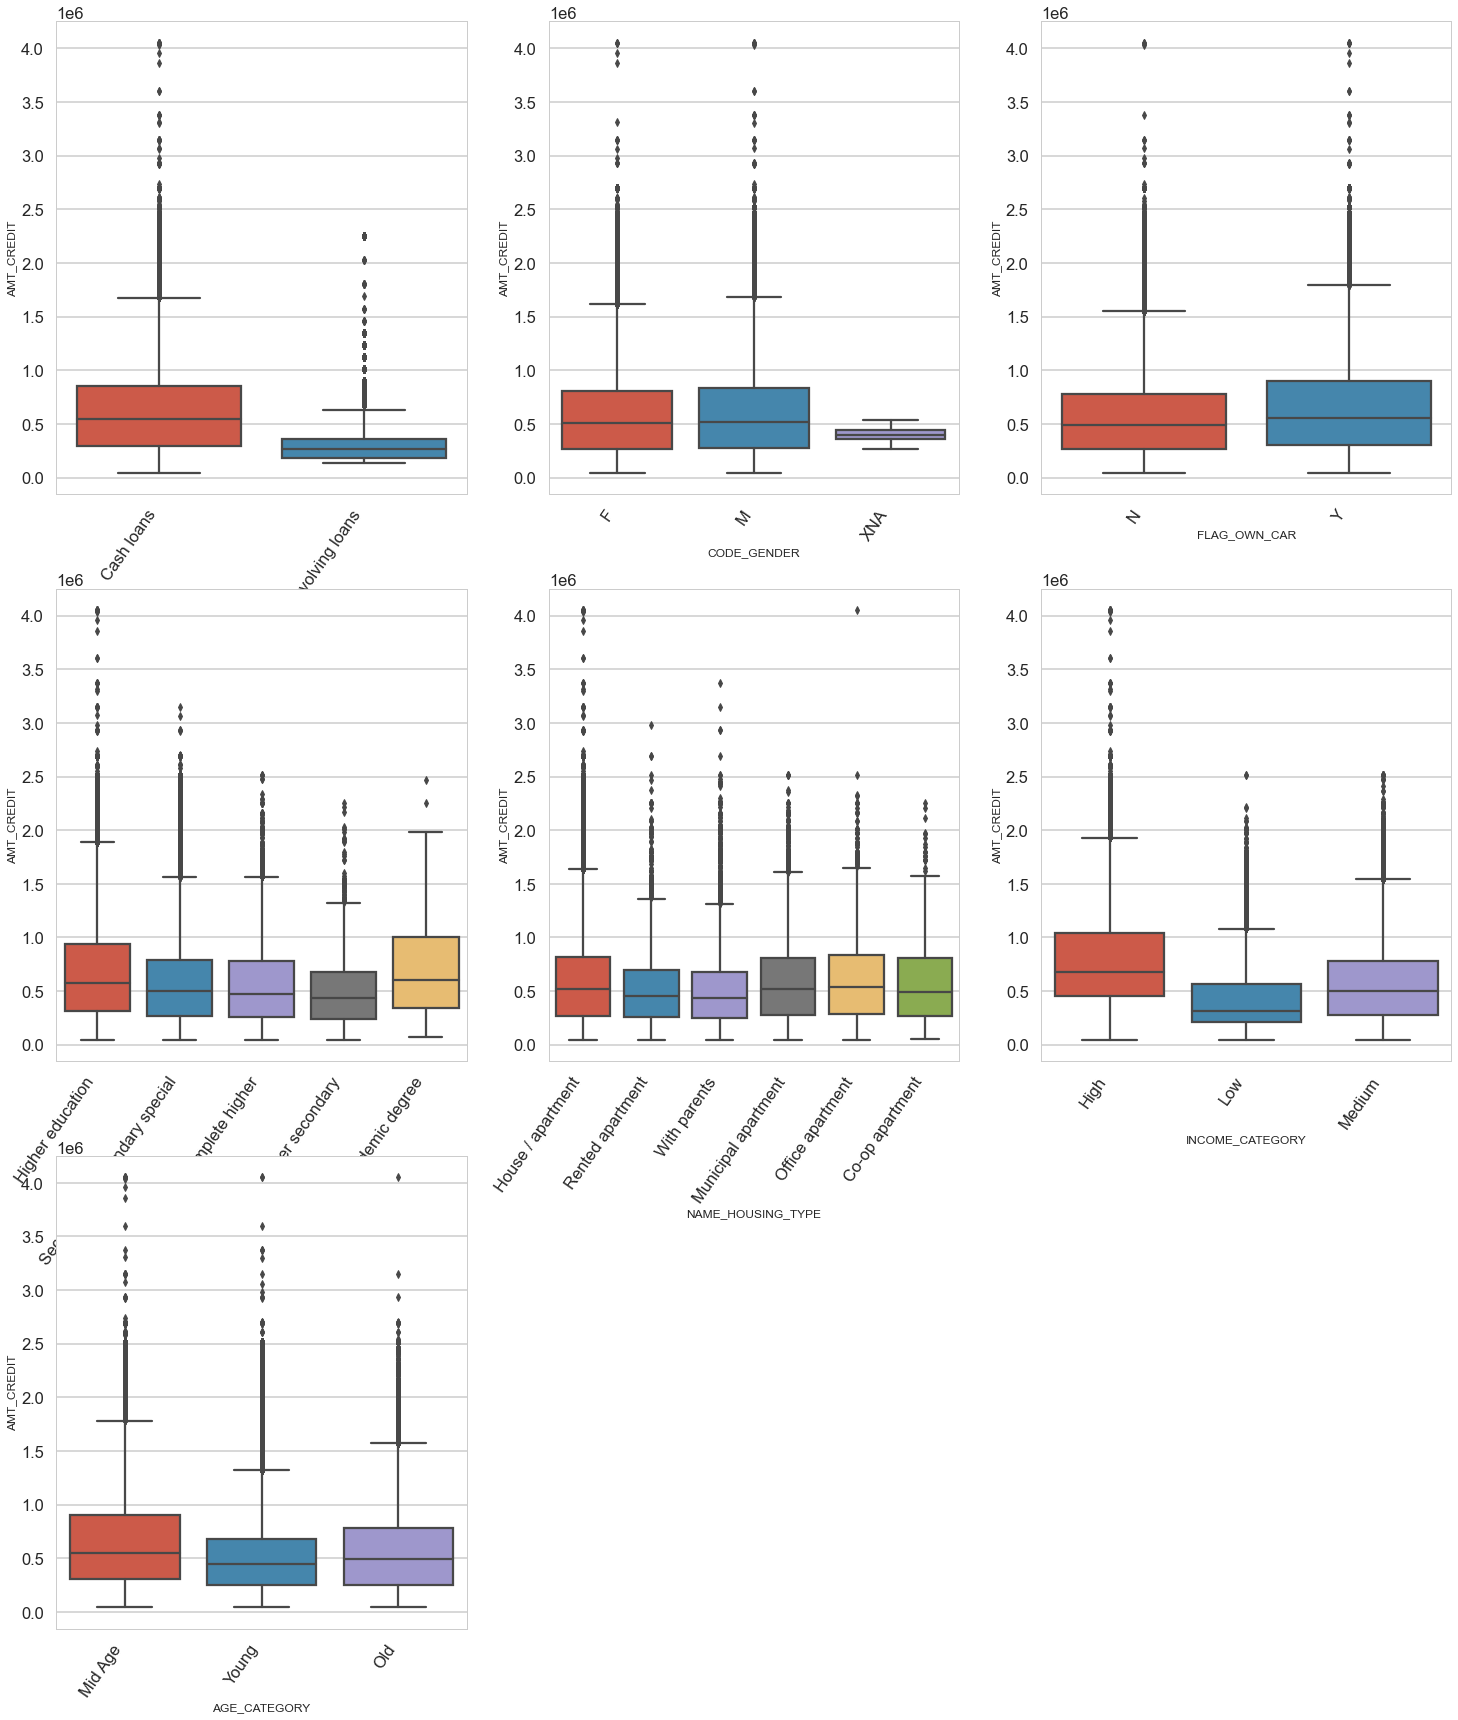

In [97]:

plt.figure(figsize=(25,40))

for i, category in enumerate(categories):
    ax = plt.subplot(4,3,i+1)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=target_nondefault,orient='v')
    temp = ax.set_xticklabels(ax.get_xticklabels(),rotation= 55,horizontalalignment='right')
plt.show()

1. Cash loans are more credited.
2. Those who are female and own car they got little more number of loans
3. State servent got more number of loans
4. Higher education got more loans
5. Applicants who are living in municipal and office apartment, got more number of loans
6. High income group people got more loans.
7. Mid age people tend to get more number of loans.

##  Multi variate Analysis

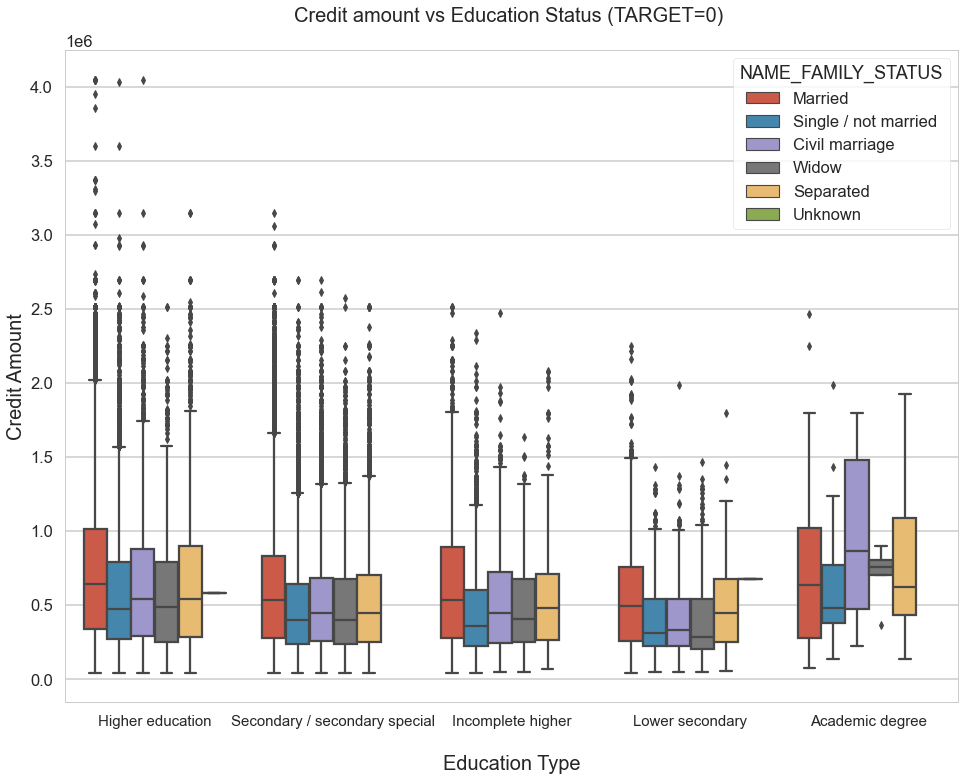

In [98]:

# Box Plotting for the Non defaulters and  Credit Amount
plt.figure(figsize=[16,12])
sns.boxplot(data =target_nondefault, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.xticks(rotation=0,fontsize=15)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Credit Amount', fontsize=20)
plt.title('Credit amount vs Education Status (TARGET=0) \n', fontsize=20)
plt.show()

From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers.

Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary of civil marriage family status are have less income amount than others.


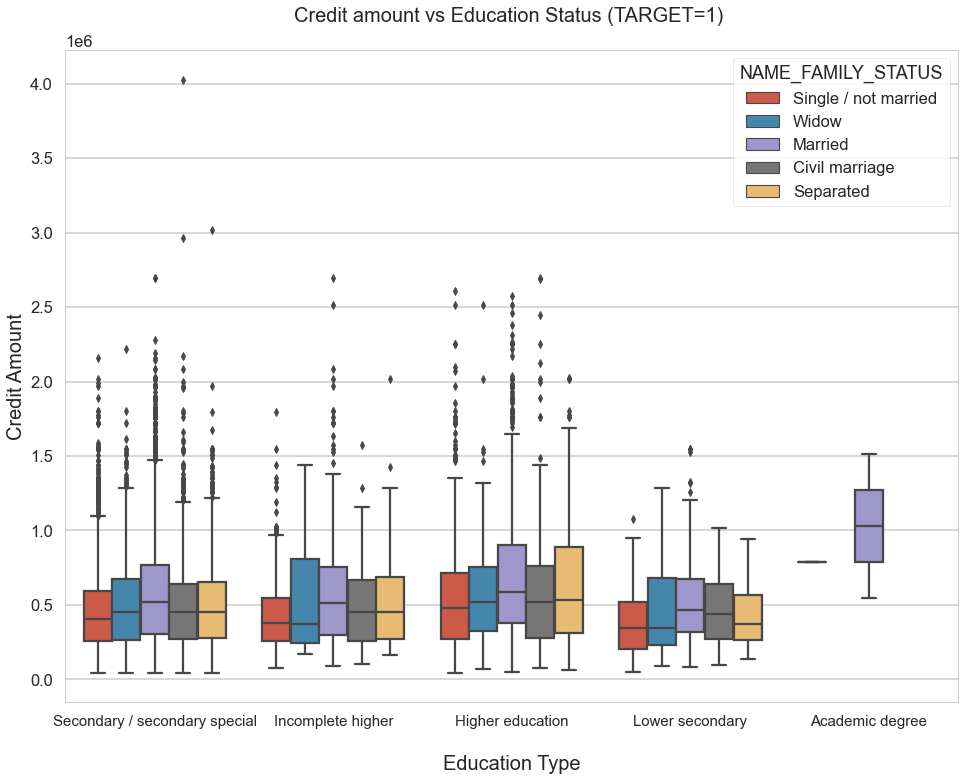

In [99]:

# Box Plotting for the Defaulters and  Credit Amount
plt.figure(figsize=[16,12])
sns.boxplot(data =target_default, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.xticks(rotation=0,fontsize=15)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Credit Amount', fontsize=20)
plt.title('Credit amount vs Education Status (TARGET=1) \n', fontsize=20)
plt.show()

From the above box plot we can say that Family status of 'civil marriage','marriage' and 'separated' of Academic degree education are having higher number of credits than others.

Most of the outliers are from Education type 'Higher education' and 'Secondary'. Civil marriage for Academic degree is having most of the credits in the third quartile.

####                                             ----------------------------------*********----------------------------------------

# Previous Application Data

In [100]:
#loading previous application data
prev_data = pd.read_csv('previous_application.csv')


In [101]:
prev_data.head(5)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans      1730.43         17145.00    17145.00              0.00         17145.00                   SATURDAY                       15                           Y                       1               0.00                   0.18                      0.87                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity        12.00           middle  POS mobile with interest           365243.00          -42.00                     300.00         -42.00            -37.00                       0.00
1     2802425      108129         Cash loans     25188.62        607500.00   679671.00               nan        607500.00                   THURSDAY                       11                           Y                       1                nan                    nan                       nan                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA        36.00       low_action          Cash X-Sell: low           365243.00         -134.00                     916.00      365243.00         365243.00                       1.00
2     2523466      122040         Cash loans     15060.74        112500.00   136444.50               nan        112500.00                    TUESDAY                       11                           Y                       1                nan                    nan                       nan                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA        12.00             high         Cash X-Sell: high           365243.00         -271.00                      59.00      365243.00         365243.00                       1.00
3     2819243      176158         Cash loans     47041.33        450000.00   470790.00               nan        450000.00                     MONDAY                        7                           Y                       1                nan                    nan                       nan                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA        12.00           middle       Cash X-Sell: middle           365243.00         -482.00                    -152.00        -182.00           -177.00                       1.00
4     1784265      202054         Cash loans     31924.40        337500.00   404055.00               nan        337500.00                   THURSDAY                        9                           Y                       1                nan                    nan                       nan                Repairs              Refused           -781  Cash through the bank   

In [102]:
prev_data.shape

(1670214, 37)

### 1.Data Quality Check for Previous Application

In [103]:
prev_data.describe()

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1670214.00  1670214.00   1297979.00       1670214.00  1670213.00         774370.00       1284699.00               1670214.00              1670214.00          774370.00                5951.00                   5951.00     1670214.00        1670214.00   1297984.00           997149.00       997149.00                  997149.00      997149.00         997149.00                  997149.00
mean   1923089.14   278357.17     15955.12        175233.86   196114.02           6697.40        227847.28                    12.48                    1.00               0.08                   0.19                      0.77        -880.68            313.95        16.05           342209.86        13826.27                   33767.77       76582.40          81992.34                       0.33
std     532597.96   102814.82     14782.14        292779.76   318574.62          20921.50        315396.56                     3.33                    0.06               0.11                   0.09                      0.10         779.10           7127.44        14.57            88916.12        72444.87                  106857.03      149647.42         153303.52                       0.47
min    1000001.00   100001.00         0.00             0.00        0.00             -0.90             0.00                     0.00                    0.00              -0.00                   0.03                      0.37       -2922.00             -1.00         0.00            -2922.00        -2892.00                   -2801.00       -2889.00          -2874.00                       0.00
25%    1461857.25   189329.00      6321.78         18720.00    24160.50              0.00         50841.00                    10.00                    1.00               0.00                   0.16                      0.72       -1300.00             -1.00         6.00           365243.00        -1628.00                   -1242.00       -1314.00          -1270.00                       0.00
50%    1923110.50   278714.50     11250.00         71046.00    80541.00           1638.00        112320.00                    12.00                    1.00               0.05                   0.19                      0.84        -581.00              3.00        12.00           365243.00         -831.00                    -361.00        -537.00           -499.00                       0.00
75%    2384279.75   367514.00     20658.42        180360.00   216418.50           7740.00        234000.00                    15.00                    1.00               0.11                   0.19                      0.85        -280.00             82.00        24.00           365243.00         -411.00                     129.00         -74.00            -44.00                       1.00
max    2845382.00   456255.00    418058.15       6905160.00  6905160.00        3060045.00       6905160.00                    23.00                    1.00               1.00                   1.00                      1.00          -1.00        4000000.00        84.00           365243.00       365243.00                  365243.00      365243.00         365243.00                       1.00

In [104]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [105]:
#checking for missing value perventage columns wise
round(100*(prev_data.isnull().sum() / len(prev_data.index)),2).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED      99.64
RATE_INTEREST_PRIMARY         99.64
RATE_DOWN_PAYMENT             53.64
AMT_DOWN_PAYMENT              53.64
NAME_TYPE_SUITE               49.12
DAYS_TERMINATION              40.30
NFLAG_INSURED_ON_APPROVAL     40.30
DAYS_FIRST_DRAWING            40.30
DAYS_FIRST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION     40.30
DAYS_LAST_DUE                 40.30
AMT_GOODS_PRICE               23.08
CNT_PAYMENT                   22.29
AMT_ANNUITY                   22.29
PRODUCT_COMBINATION            0.02
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_CREDIT                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
AMT_APPLICATION                0.00
NAME_PAYMENT_TYPE              0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
CODE_REJECT_REASON          

In [106]:
#dropping all the columns which has missing value more than 30%
previous_df = prev_data.drop(prev_data.columns[prev_data.isnull().mean() >= 0.5], axis = 1)

In [107]:
previous_df.shape

(1670214, 33)

In [108]:
# dropping columns whicha are not significant for the analysis.
cols_to_be_deleted = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT', 
                      'NFLAG_LAST_APPL_IN_DAY','SELLERPLACE_AREA','PRODUCT_COMBINATION']

previous_df = previous_df.drop(cols_to_be_deleted, axis = 1)

In [109]:
# converting all DAYS columns to month columns
previous_df['DAYS_DECISION'] = abs(previous_df['DAYS_DECISION'] // 30)

In [110]:
previous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 27 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   SK_ID_PREV                 1670214 non-null  int64  
 1   SK_ID_CURR                 1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE         1670214 non-null  object 
 3   AMT_ANNUITY                1297979 non-null  float64
 4   AMT_APPLICATION            1670214 non-null  float64
 5   AMT_CREDIT                 1670213 non-null  float64
 6   AMT_GOODS_PRICE            1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE     1670214 non-null  object 
 8   NAME_CONTRACT_STATUS       1670214 non-null  object 
 9   DAYS_DECISION              1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE          1670214 non-null  object 
 11  CODE_REJECT_REASON         1670214 non-null  object 
 12  NAME_TYPE_SUITE            849809 non-null   object 
 13  NAME_CLIENT_

#### Top 10 correlation in Previous application

In [111]:
# getting top 10 correlation in previos application

corr=previous_df.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

Column1             Column2  Correlation  Abs_Correlation
73             AMT_GOODS_PRICE     AMT_APPLICATION         1.00             1.00
74             AMT_GOODS_PRICE          AMT_CREDIT         0.99             0.99
59                  AMT_CREDIT     AMT_APPLICATION         0.98             0.98
179           DAYS_TERMINATION       DAYS_LAST_DUE         0.93             0.93
72             AMT_GOODS_PRICE         AMT_ANNUITY         0.82             0.82
58                  AMT_CREDIT         AMT_ANNUITY         0.82             0.82
44             AMT_APPLICATION         AMT_ANNUITY         0.81             0.81
148  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DRAWING        -0.80             0.80
101                CNT_PAYMENT     AMT_APPLICATION         0.68             0.68
102                CNT_PAYMENT          AMT_CREDIT         0.67             0.67

## Merging the two datasets, i.e. application_dataset and previous_application

In [112]:
# Merging of the two datasets,
loan_merge = pd.merge(left = application_data, right = previous_df, how = 'left', on = 'SK_ID_CURR')
loan_merge.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  AMT_REQ_CREDIT_BUREAU_YEAR  YEARS WORKED  CREDIT_INCOME_RATIO INCOME_CATEGORY AGE_CATEGORY CREDIT_CATEGORY  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE_y NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0      100002       1           Cash loans           M            N               Y             0            202500        406597       24700.50          351000.00     Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment          26           -637              -3648        Laborers             1.00                     2                            2                           0                           0                            0                       0                       0                        0  Business Entity Type 3                        1.00             1                 2.00            High        Young             Low  1038818.00       Consumer loans        9251.77        179055.00     179055.00          179055.00                    XAP             Approved          21.00                    XNA                XAP               NaN              New              Vehicles            POS               XNA   
1      100003       0           Cash loans           F            N               N             0            270000       1293502       35698.50         1129500.00            Family    State servant               Higher education               Married  House / apartment          46          -1188              -1186      Core staff             2.00                     1                            1                           0                           0                            0                       0                       0                        0                  School                        0.00             3                 5.00            High      Mid Age            High  1810518.00           Cash loans       98356.99        900000.00    1035882.00          900000.00                    XNA             Approved          25.00                    XNA                XAP     Unaccompanied         Repeater                   XNA           Cash            x-sell   
2      100003       0           Cash loans           F            N               N             0            270000       1293502       35698.50         1129500.00            Family    State servant               Higher education               Married  House / apartment          46          -1188              -1186      Core staff             2.00                     1                            1                           0                           0                            0                       0                       0                        0                  School                        0.00             3                 5.00            High      Mid Age            High  2636178.00       Consumer loans       64567.67        337500.00     348637.50          337500.00                    XAP             Approved          28.00  Cash through the bank                XAP            Family        Refreshed             Furniture            POS               XNA   
3      100003       0           Cash loans           F            N    

In [113]:
loan_merge.shape

(1430155, 62)

In [114]:
# checking for the null value column wise
loan_merge.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE_x                0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT_x                        0
AMT_ANNUITY_x                      93
AMT_GOODS_PRICE_x                1219
NAME_TYPE_SUITE_x                4031
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
OCCUPATION_TYPE                462731
CNT_FAM_MEMBERS                     2
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT

In [115]:
loan_merge=loan_merge.rename({'NAME_CONTRACT_TYPE_x' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_x':'AMT_CREDIT','AMT_ANNUITY_x':'AMT_ANNUITY',
                             'NAME_TYPE_SUITE_x':'NAME_TYPE_SUITE','AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE',
                              'NAME_CONTRACT_TYPE_y':'NAME_CONTRACT_TYPE_PREV','AMT_GOODS_PRICE_y':'AMT_GOODS_PRICE_PREV',
                              'AMT_CREDIT_y':'AMT_CREDIT_PREV' ,'AMT_ANNUITY_y':'AMT_ANNUITY_PREV',
                              'NAME_TYPE_SUITE_y':'NAME_TYPE_SUITE_PREV'
                             }, axis=1)

loan_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 62 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1430155 non-null  int64  
 1   TARGET                       1430155 non-null  int64  
 2   NAME_CONTRACT_TYPE           1430155 non-null  object 
 3   CODE_GENDER                  1430155 non-null  object 
 4   FLAG_OWN_CAR                 1430155 non-null  object 
 5   FLAG_OWN_REALTY              1430155 non-null  object 
 6   CNT_CHILDREN                 1430155 non-null  int64  
 7   AMT_INCOME_TOTAL             1430155 non-null  int32  
 8   AMT_CREDIT                   1430155 non-null  int32  
 9   AMT_ANNUITY                  1430062 non-null  float64
 10  AMT_GOODS_PRICE              1428936 non-null  float64
 11  NAME_TYPE_SUITE              1426124 non-null  object 
 12  NAME_INCOME_TYPE             1430155 non-n

### Univariate analysis on categorical columns

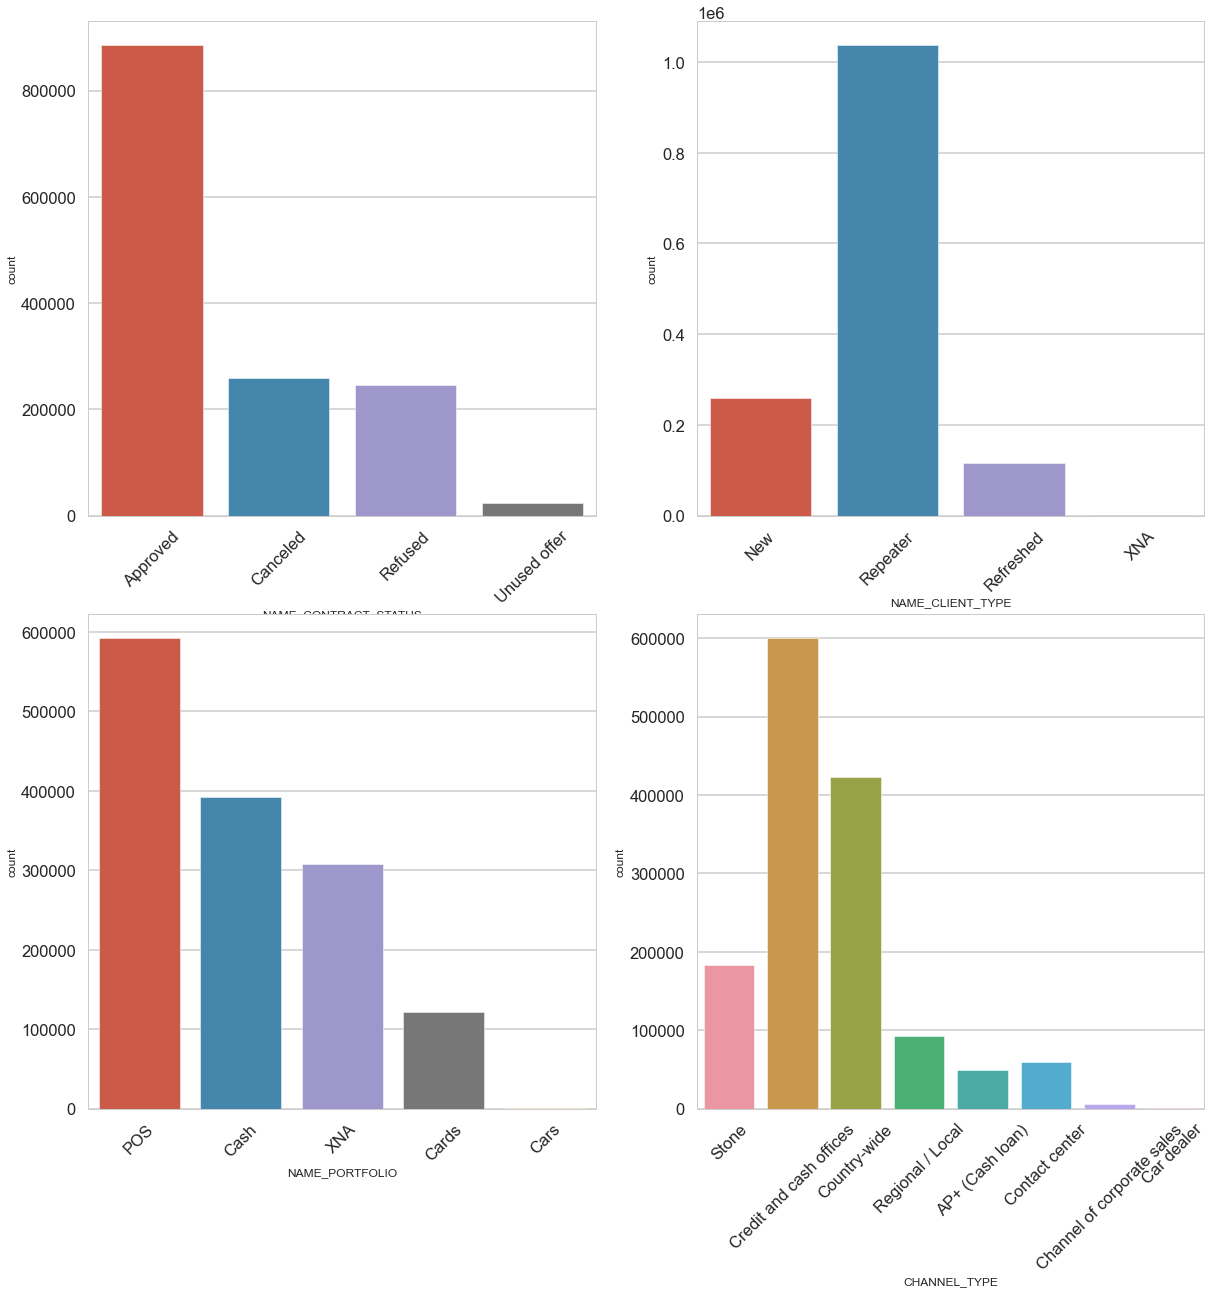

In [116]:
#plotting count plot for categorical columns
categorical = ['NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE']
plt.figure(figsize = (20,20))
i = 1
for col in categorical:
    plt.subplot(2,2,i)
    sns.countplot(x = col , data = loan_merge)
    plt.xticks(rotation = 45)
    i += 1
plt.show()


1. Approved loan status is huge than rejected or canceled.
2. Repeater clients are highest in number than new client.
3. POS loans are highest rather than cash loans.
4. Credit and cash offices channel type is the most used channel followed by Country-wide channel

### Univariate analysis on continuous columns

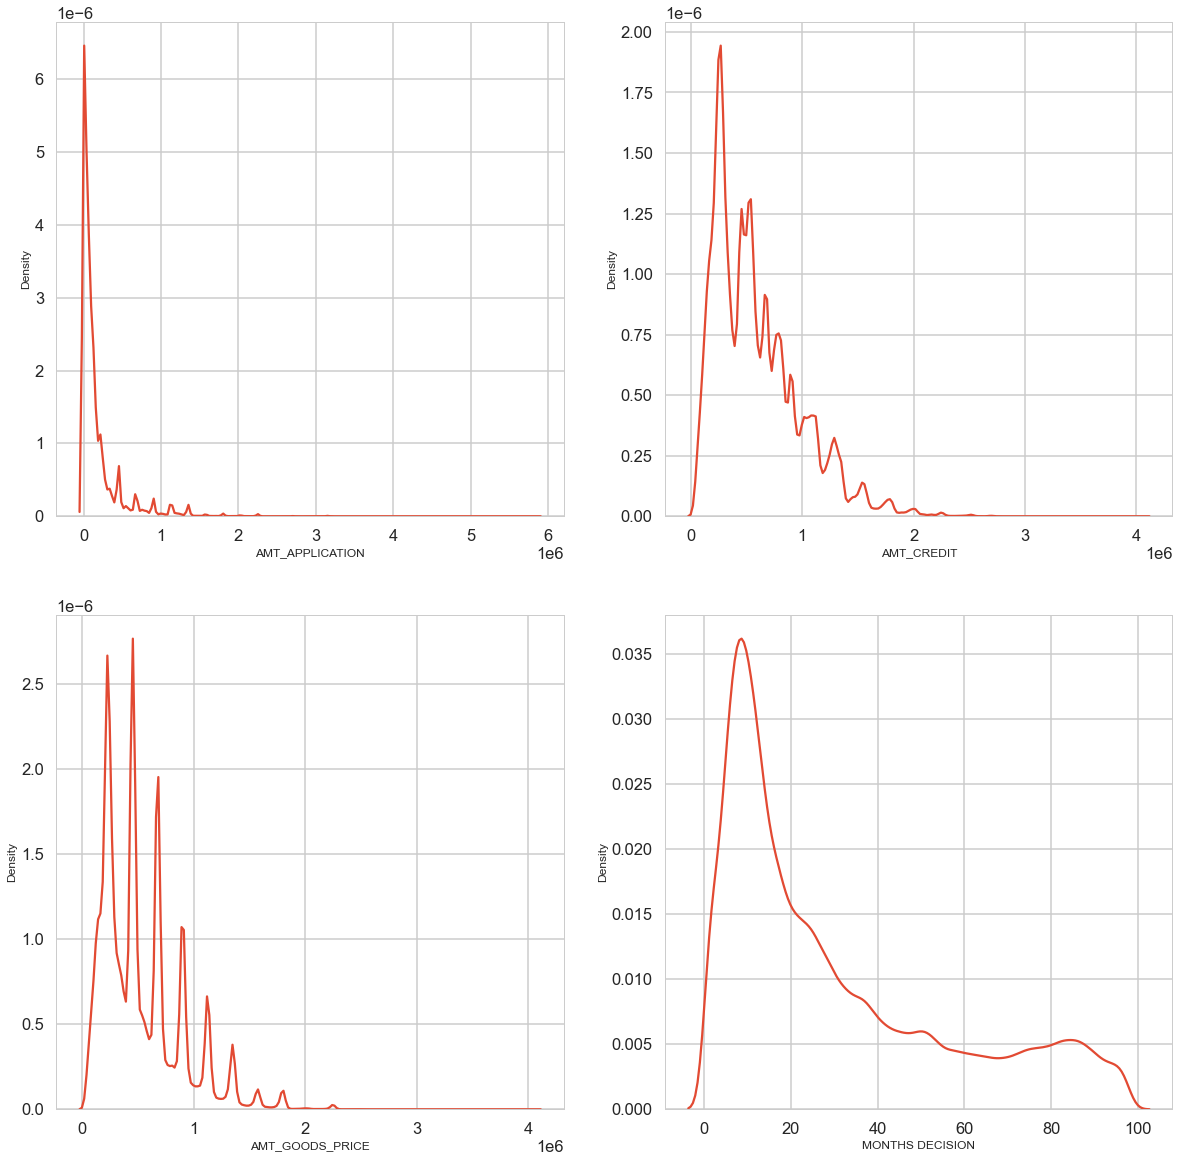

In [117]:
#plotting kde plot for CONTINOUS columns
continous = ['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION']

plt.figure(figsize = (20,20))
i = 1
for col in continous:
    plt.subplot(2,2,i)
    if col == 'DAYS_DECISION':
        ax = sns.kdeplot(loan_merge[col], label = 'MONTHS DECISION')
        ax.set(xlabel = 'MONTHS DECISION')
    else:
        ax = sns.kdeplot(loan_merge[col])
        ax.set(xlabel = col)
    i += 1
plt.show()

Analysis
1. Most of the loan application amount were below 500000, we can see a huge spike around 100000 amount.
2. Amount credited, is also following the pattern of loan application. We already saw that most of the application was approved in previous plots.
3. Amount of the goods price is also following the same distribution like application amount and amount credited. Because, based on the price of the goods, the loan was approved and amount was credited.
4. Most of the applications decision took around 10 to 20 months

#### Plotting on contract status vs target

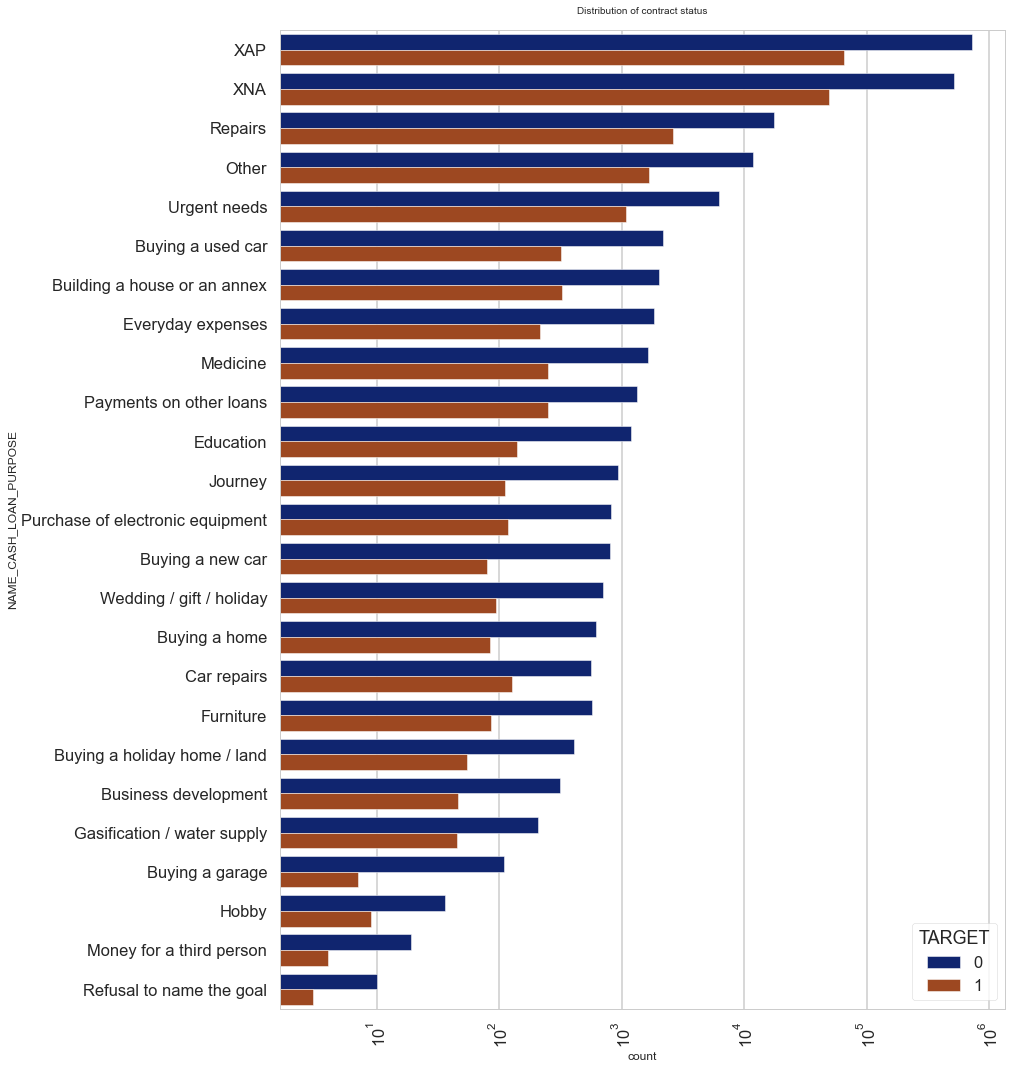

In [118]:
# Plotting on contract status vs target

plt.figure(figsize=(13,18))
plt.title("Distribution of contract status\n", fontsize=10)
plt.xticks(rotation=90)
plt.xscale('log')
sns.countplot(data=loan_merge,hue ='TARGET', y='NAME_CASH_LOAN_PURPOSE',order=loan_merge['NAME_CASH_LOAN_PURPOSE'].value_counts().index,palette='dark')
plt.show()

1. Loan purposes with 'Repairs' are facing more difficulites in payment on time.
2. There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt','Buying land','Buying a new car' and 'Education' Hence we can focuson these purposes for which the client is having for minimal payment difficulties.

#### Plotting on contract status vs target

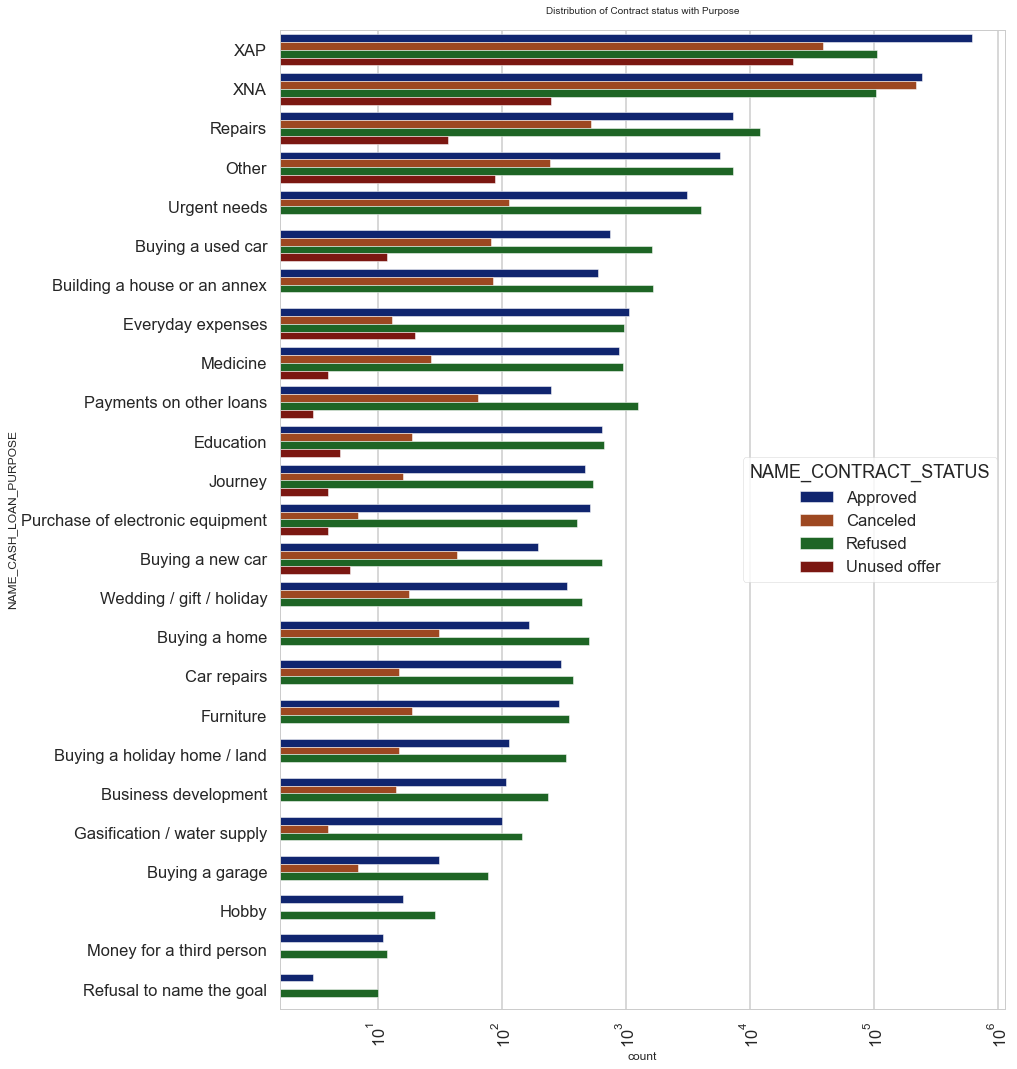

In [119]:
# Plotting on contract status vs target

plt.figure(figsize=(13,18))
plt.title("Distribution of Contract status with Purpose\n", fontsize=10)
plt.xticks(rotation=90)
plt.xscale('log')
sns.countplot(data=loan_merge,hue ='NAME_CONTRACT_STATUS', y='NAME_CASH_LOAN_PURPOSE',order=loan_merge['NAME_CASH_LOAN_PURPOSE'].value_counts().index,palette='dark')
plt.show()

1. Most rejection of loans came from purpose 'Repairs'.
2. For education purposes we have equal number of approves and rejection.
3. There is more rejection than approval for buying used car
3. Paying other loans and buying a new car is having significant higher rejection than approves

 # Bivariate Analysis

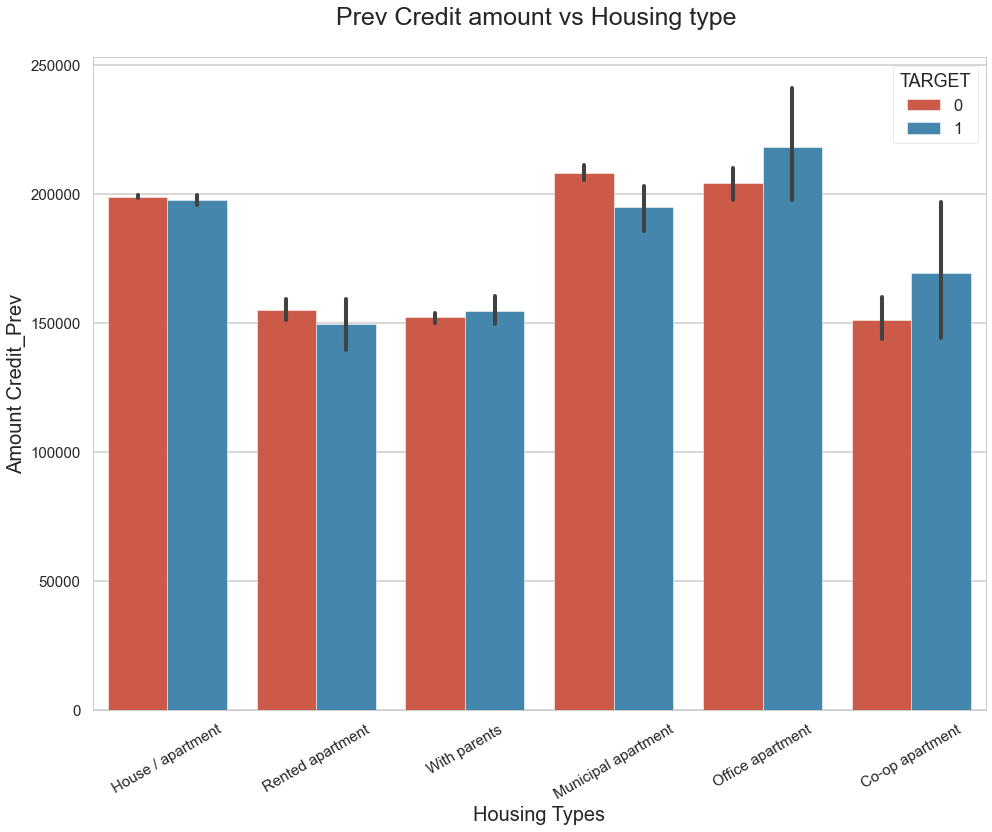

In [120]:
# Plotting for Credit amount prev vs Housing type,
plt.figure(figsize=(16,12))
plt.xticks(rotation=30)
sns.barplot(data =loan_merge, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type \n', fontsize=25)
plt.ylabel('Amount Credit_Prev', fontsize=20)
plt.xlabel('Housing Types', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Here for Housing type, Municipal is having higher credit of target 0 and office apartment is having higher credit of target=1.

So, we can conclude that bank should avoid giving loans to the housing type of office apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or rented apartment or muncipal apartment for successful payback of loan.


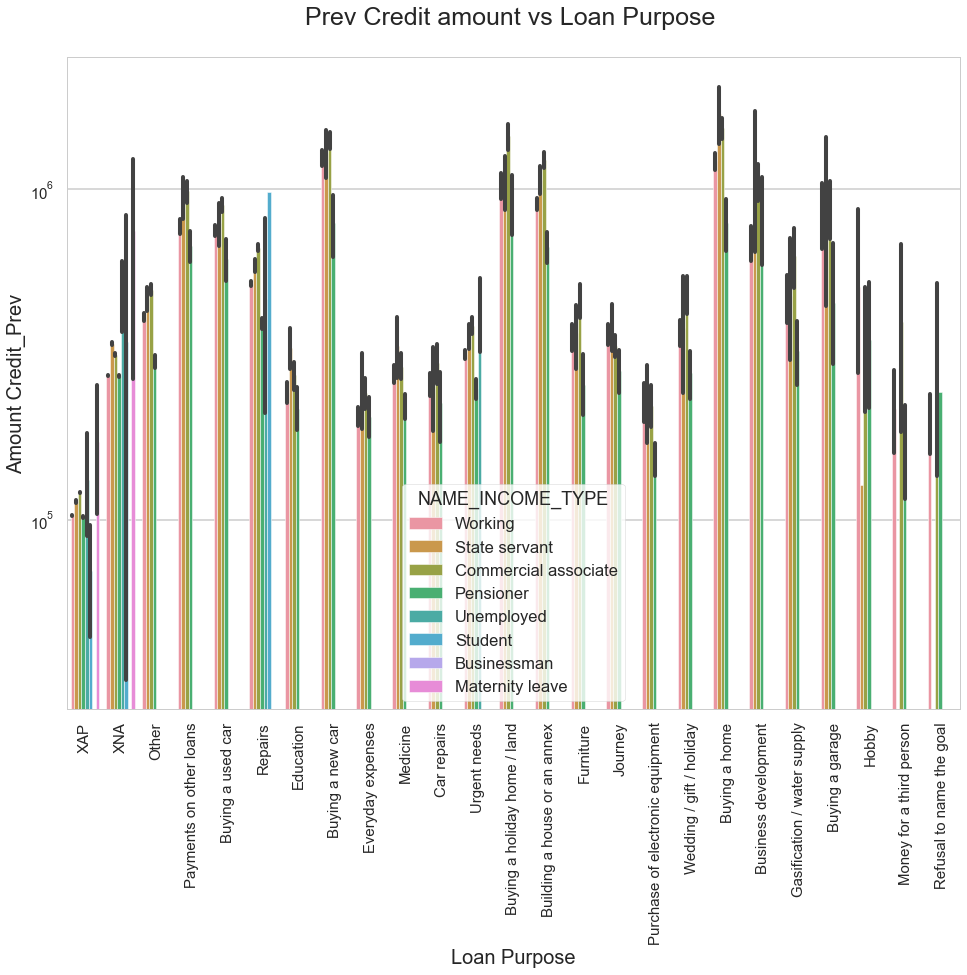

In [121]:
# Plotting for Credit amount prev inlogarithimic scale with Name income type,
plt.figure(figsize=(16,12))
plt.xticks(rotation=30)
sns.barplot(data =loan_merge, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV')
plt.xticks(rotation=90)
plt.ylabel('Amount Credit_Prev', fontsize=20)
plt.xlabel('Loan Purpose', fontsize=20)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Prev Credit amount vs Loan Purpose \n', fontsize=25)
plt.show()

1. The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
2. Income type of state servants have a significant amount of credit applied
3. Money for third person or a Hobby is having less credits applied for.


### Bivariate analysis on categorical columns

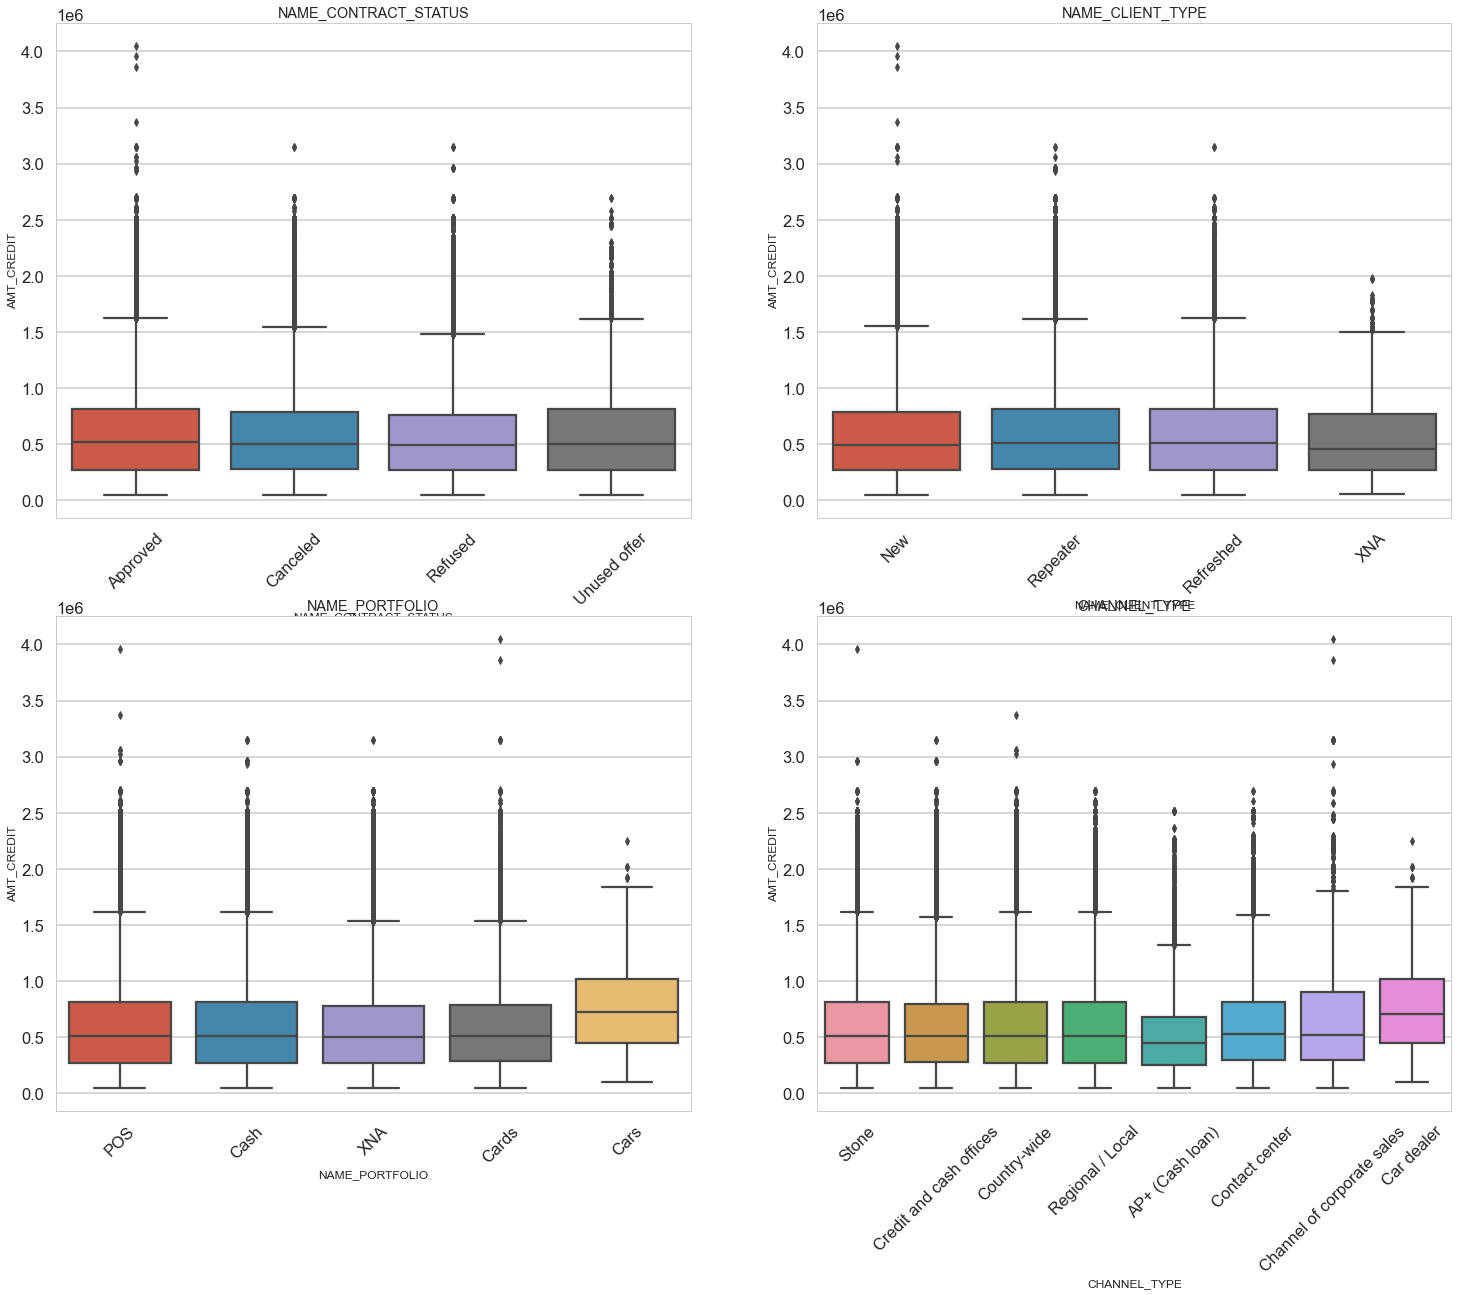

In [122]:
plt.figure(figsize=(25,20))
i=1
for category in categorical:
    ax = plt.subplot(2,2,i)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=loan_merge)
    plt.title(category)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
    i += 1
plt.show()

Analysis

1. There wer more unused offer, more ouliers noticed in  approved application who have taken larger credit
2. Outliers amore in new  clinet type, Refreshed and Repeater client have same median
3. Car loan got more credited of all portfolio.
4. Through the car dealer more loan got credited, folowed by channel of corporate sales

# CONCLUSION:

1. Bank can focus mostly on housing type with parents or rented appartment or muncipal appartment for successful payback of loan.
2. Banks should provide loans to Repairs and other purposes.
3. Banks should provide loans to the Business Entity Type-3 and Self-Employed persons.
4. Working people especially female employers are the best to target for the loans 